In [1]:
import sys
import seaborn as sns
import os
import glob
from matplotlib import pyplot as plt
import numpy as np
import avalanches as crfn
#import kuramoto as kmox
import plot as pltfn
from kuramoto1 import Kuramoto
sns.reset_orig()
plt.style.use('dark_background')

%load_ext autoreload
%autoreload

# Define paths
#---------------------------------------------------------------------------
Fdrop = '/Users/dominicburrows/Dropbox/PhD/analysis/'
Fmac = '/Users/dominicburrows/Documents/'
F10t = '/Volumes/Dominic 10tb/'
Ffig = '/Users/dominicburrows/Dropbox/PhD/figures/'
Ftm = '/Volumes/Dominic Time Machine/'

/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


# Find nearest neighbours

In [2]:
# Create lists of coord data
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
coordlist = sorted(glob.glob('*BLN*realcoord.npy'))
coordlist

['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_realcoord.npy',
 'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01_realcoord.npy',
 'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_realcoord.npy',
 'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01_realcoord.npy',
 'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01_realcoord.npy',
 'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_realcoord.npy',
 'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01_realcoord.npy',
 'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01_realcoord.npy',
 'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_realcoord.npy',
 'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_realcoord.npy',
 'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09_realcoord.npy']

## 0.01 - 0.2 cnt: 7 microns - 150 microns

In [3]:
cntlist = [0.21, 0.22, 0.23]
cntlist

[0.21, 0.22, 0.23]

In [ ]:
#Calculate nearest neighbours for each cell 
#rng = nearest number of cells with which to build neighbour graph from
#dim = define distance of each pixel in x,y,z, cnt = select which % of neighbours to include
#cnt = 0.1
#-------------------------------------------------------------------------------------------------

for t in range(len(cntlist)):
    count = cntlist[t]
    Fnnb = crfn.neighbour(Fdrop, experiment, coordlist, rng = 6000, dim = [.8, .8, 15], cnt = count)

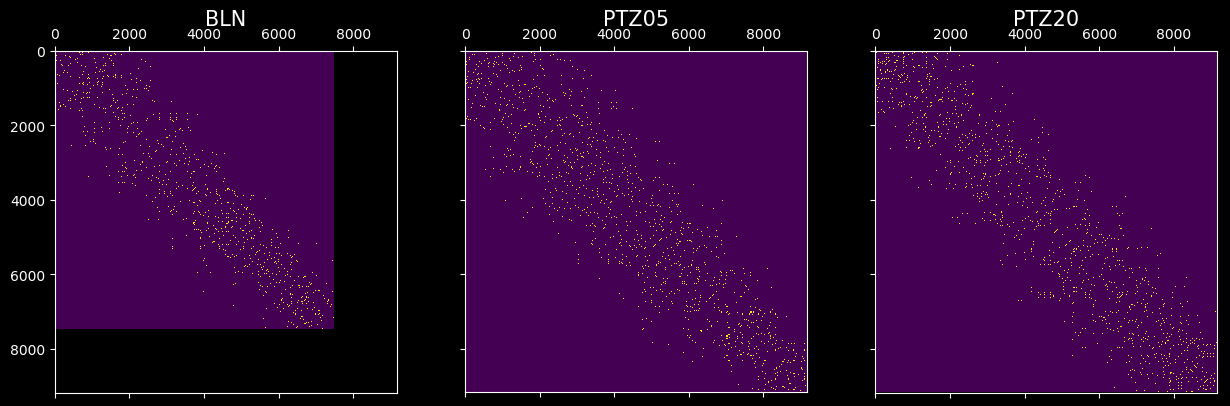

In [80]:
#PLOT - included nearest neighbours
#--------------------------------------------------
pltfn.rasplot(namelist = nnblist)

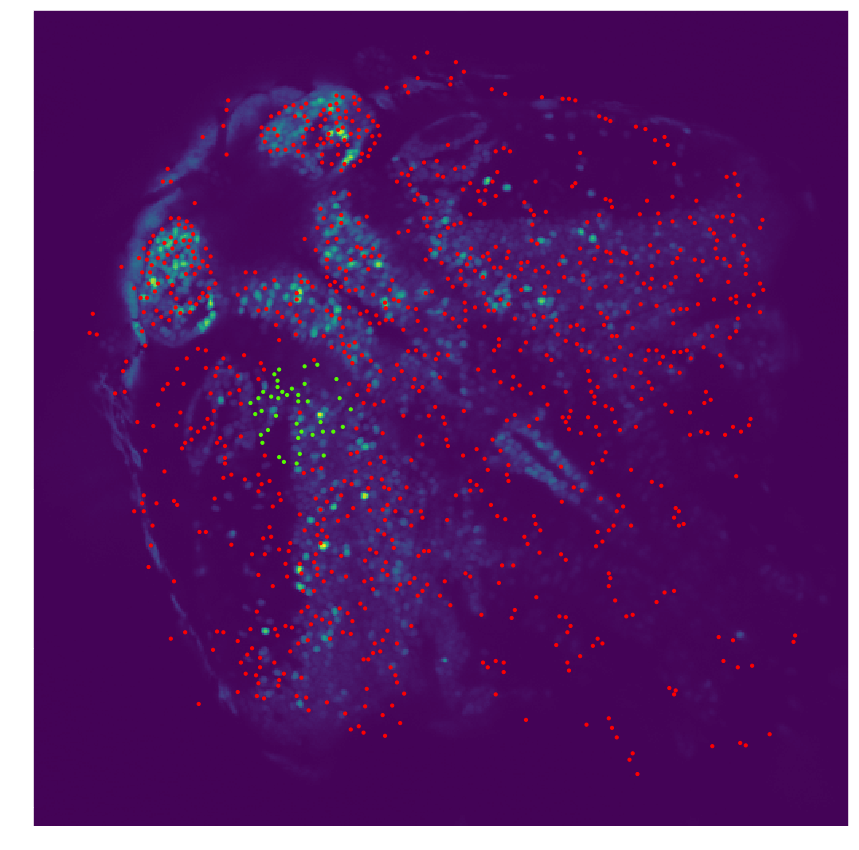

In [5]:
# Plot an illustrative example
#rdshift - right down, rushift - right up
#------------------------------------------------------
plane = 3
cell = 10
experiment = 'PTZ-WILDTYPE'
fnum = '07'
condition = 'BLN'
prefix = '/2photon/sess-01-6dpf/'

Fncellplot = crfn.cellplot(Ftm, Fdrop, experiment, fnum, prefix, condition, plane, cell, xshift = 10, yshift = 15)

# Calculate avalanche statistics

In [5]:
# Create datalists
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
itbinlist = sorted(glob.glob('*-03*.*binarised*')) #iterated list - binarised trace
binlist = sorted(glob.glob('*BLN*binarised.npy')) #list - binarised trace
cutbinlist = sorted(glob.glob('*cutbinarised.npy')) #list - 30 minute binarised trace
nnblist = sorted(glob.glob('*BLN*nnb.npy')) #list - nearest neighbour matrix
itnnblist = sorted(glob.glob('*-02*.*nnb.npy*')) #iterated list - nearest neighbour matrix
pkglist = sorted(glob.glob('*pkg*')) #list - peak group duration
avlist = sorted(glob.glob('*av*')) #list - avalanche size and duration array
#branchlist = sorted(glob.glob('*branch*'))
#expsizelist = sorted(glob.glob('*sizeexponent*'))
#Rlist = sorted(glob.glob('*loglik.npy*'))
#plist = sorted(glob.glob('*loglikp*'))
itnnblist

['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_0.04nnb.npy',
 'PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_0.05nnb.npy',
 'PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_0.06nnb.npy',
 'PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_0.07nnb.npy',
 'PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_0.08nnb.npy',
 'PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_0.09nnb.npy',
 'PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_0.10nnb.npy',
 'PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_0.11nnb.npy',
 'PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_0.12nnb.npy',
 'PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_0.13nnb.npy',
 'PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_0.14nnb.npy',
 'PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_0.15nnb.npy',
 'PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_0.16nnb.npy',
 'PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_0.17nnb.npy',
 'PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_0.18nnb.npy',
 'PTZ-WILDTYPE-02_2photon_sess-01-6dpf_B

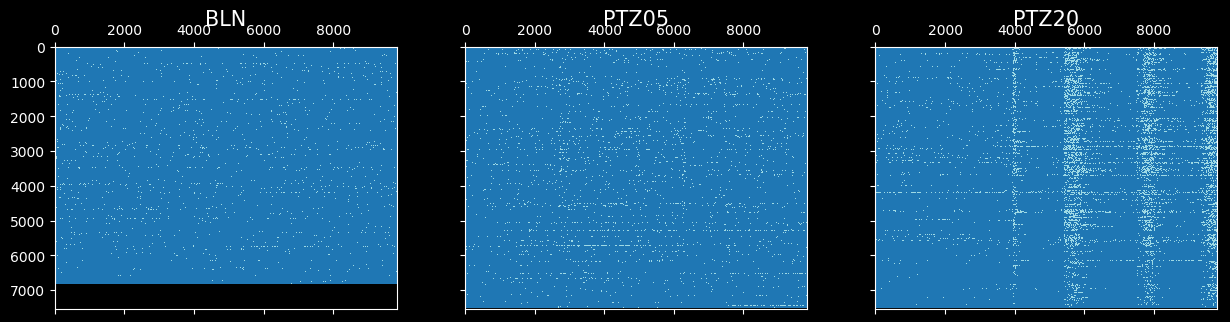

In [805]:
# PLOT - detected peaks
#---------------------------------------
pltfn.rasplot(namelist = binlist)

In [189]:
#cut in half trace (first half)
#--------------------------------
for i in range(len(binlist)):
    half = np.load(binlist[i])[:, :4914]
    np.save(Fdrop + 'Project/' + experiment + os.sep + nnblist[i][:nnblist[i].find('nnb')] + 'cutbinarised.npy', half)

In [ ]:
# Avalanche calculation
#---------------------------------------------------------------------------
for t in range(len(itbinlist)):
    bind = itbinlist[t]

    Fav, Fpkg = itavalanche(itnnblist, bind, Fdrop, experiment)

In [11]:

#=======================================================================
def itavalanche(itnnblist, bind, Fdrop, experiment): # duration = yes convergence (no back propagation, earliest avalanche consumes meeting avalanche, and later avalanche terminates), cells in t must be active in t+1)
#=======================================================================
    import numpy as np
    import os
    import itertools

#Calculate avalanche size + duration
#-----------------------------------
    avlist = list(range(len(itnnblist)))
    pkglist = list(range(len(itnnblist)))
    pkgvec = []
    oldav = []
    firstav = []
    avonly = []
    loc = []
    celloc = []
    timeloc = []
    realav = []
    timemachine = []
    convertav = []
    fill = []
    time = []
    uniteav = []
    
    
    #LOOP THROUGH EACH FISH
    #---------------------------------
    #---------------------------------
    for y in range(len(avlist)): 
        binarray = np.load(bind)
        nnbarray = np.load(itnnblist[y])
        pkg    = np.zeros(binarray.shape) #peak groups by timebin
        i = 0
        marker = 0
        avcount = 0
        
        #LOOP THROUGH EACH TIME POINT
        #------------------------------
        #------------------------------
        for t in range(binarray.shape[1]-1): #loop through all time points
            if i% round(10*binarray.shape[1]/100) == 0: print('doing time step ' + str(i) + 'of' + str(binarray.shape[1]) + 'for fish ' + str(y))
            i = i+1
            cid = np.where(binarray[:,t] > 0)[0]  #cid = cells active at current time point
    
            
            #LOOP THROUGH EACH ACTIVE CELL
            #-------------------------------
            #-------------------------------
            for c in cid:            #loop through all active cells at this time point

                if pkg[c,t] == 0:    #only find non-marked cells
                    if len(np.intersect1d(np.where(nnbarray[c,:] > 0)[0], cid) > 2): #if >2 neighbours active
                        marker = marker + 1  
                        pkg[c,t] = marker  #mark active non-marked cell with new marker value
                       

                #LOCATE ALL NEIGHBOURS
                #----------------------------
                #----------------------------
                neighbour = np.where(nnbarray[c,:] > 0)[0]  #return indeces of current cell neighbours
                neighbouron  = np.intersect1d(cid,neighbour) #indeces of active cells in t, and also neighbours of c
                where0 = np.where(pkg[neighbouron,t] == 0)[0] #neighbours not already part of an avalanche
                
                #CONVERT NEIGHBOURS WHO ARE ALREADY PART OF AN AVALANCHE
                #-------------------------------------------------------
                #-------------------------------------------------------

                if len(where0) < len(neighbouron): #if any cells are already part of another avalanche
                    oldav = np.unique(pkg[neighbouron, t]) #all avalanche values from neighbours
                    firstav = np.min(oldav[np.where(oldav > 0)])   #minimum avalanche value that is not 0
                    
                    #define which cells we want to combine
                    realav =  oldav[np.where(oldav > 0)] #all avalanche values that are not 0
                    uniteav = np.where(pkg[:,t]==realav[:,None])[1] #indeces of all cells that need to be connected
                    pkg[uniteav,t] = firstav #convert all current cell neighbours and their active neighbours 
                    pkg[c,t] = firstav #also convert current cell
                    
                    #GO BACK IN TIME AND CONVERT
                    #----------------------------
                    #----------------------------
                    convertav = realav[1:] #avalanche numbers needing to be converted
                    if t < 30:
                        time = t-1
                
                    elif t>30:
                        time = 30
                        
                    for e in range(convertav.shape[0]):
                        for timemachine in range(1, time): #loop through max possible time of previous avalanche
                            fill = np.where(pkg[:,t-timemachine] == convertav[e])[0]
                            if fill.shape[0] > 0:
                                pkg[fill, t-timemachine] = firstav 
                                    
                                #return(c, t, pkg, convertav, timemachine, time, fill)
                            
                
                #CONVERT NEIGHBOURS WHO ARE NOT PART OF AN AVALANCHE
                #-------------------------------------------------------
                #-------------------------------------------------------
                if len(where0) == len(neighbouron): #if all cells are not part of an avalanche
                    pkg[neighbouron[where0],t] = pkg[c,t]  

            
            #SEE IF AVALANCHE CAN PROPAGATE TO NEXT TIME FRAME
            #-------------------------------------------------------
            #-------------------------------------------------------
            n_av = np.unique(pkg[:,t])  #returns the marker values for each avalanche at this time point
    
            for n in n_av: #loop through each avalanche in this time point
                if n > 0:
                    cgroup = np.where(pkg[:,t] == n)[0] #cells that are in same avalanche at t
                    cid2 = np.where(binarray[:,t+1] > 0) #cells in next time point that are active
                    intersect = np.intersect1d(cgroup, cid2) #check if any of the same cells are active in next time point
                    wherealso0 = np.where(pkg[intersect,t+1] == 0)[0] #here we find all cells that are active in both time frames, and that are not already part of another avalanche - and mark them as current avalanche
                    pkg[intersect[wherealso0], t+1] = pkg[cgroup[0],t] #carry over value to next frame for those cells
      
    
    
    
        allmark = np.unique(pkg)[1:] #all unique marker values

        #CALCULATE AVALANCHE SIZE
        #-------------------------------------------------------
        #-------------------------------------------------------
        avsize = np.unique(pkg, return_counts = True)[1][1:] #return counts for each unique avalanche
        frameslist = np.zeros(avsize.shape[0]) #create empty frames list of same length

        #CALCULATE AVALANCHE DURATION
        #-------------------------------------------------------
        #-------------------------------------------------------
        avpertimelist = list(range(pkg.shape[1])) #empty list of length time frames

        for e in range(pkg.shape[1]): #loop through each time point in pkg
                avpertime = np.unique(pkg[:,e]) #unique marker value in each time point
                avpertimelist[e] = avpertime #fill list of unique values in each time point
                          
        #link entire recording together
        #-----------------------------------------------------------
        linktime = list(itertools.chain(*avpertimelist)) #vector of all unique marker values in each time bin linked together
        framesvec = np.unique(linktime, return_counts = True)[1][1:] #vector of number of frames for each consecutive avalanche

        #COMBINE AV SIZE AND DURATION INTO ONE ARRAY
        #-------------------------------------------------------
        #-------------------------------------------------------
        avsizecut = avsize[avsize >= 3]  #only select avalanches above 2
        avframescut = framesvec[[avsize >=3]]
        av = np.vstack((avsizecut, avframescut))      
    
        avlist[y] = av
        pkglist[y] = pkg
        np.save(Fdrop + 'Project/' + experiment + os.sep + bind[:bind.find('run')+15] + itnnblist[y][itnnblist[y].find('nnb')-4:itnnblist[y].find('nnb')+3] + 'av.npy', avlist[y])
        np.save(Fdrop + 'Project/' + experiment + os.sep + bind[:bind.find('run')+15] + itnnblist[y][itnnblist[y].find('nnb')-4:itnnblist[y].find('nnb')+3] + 'pkg.npy', pkglist[y])
    return(avlist, pkglist)





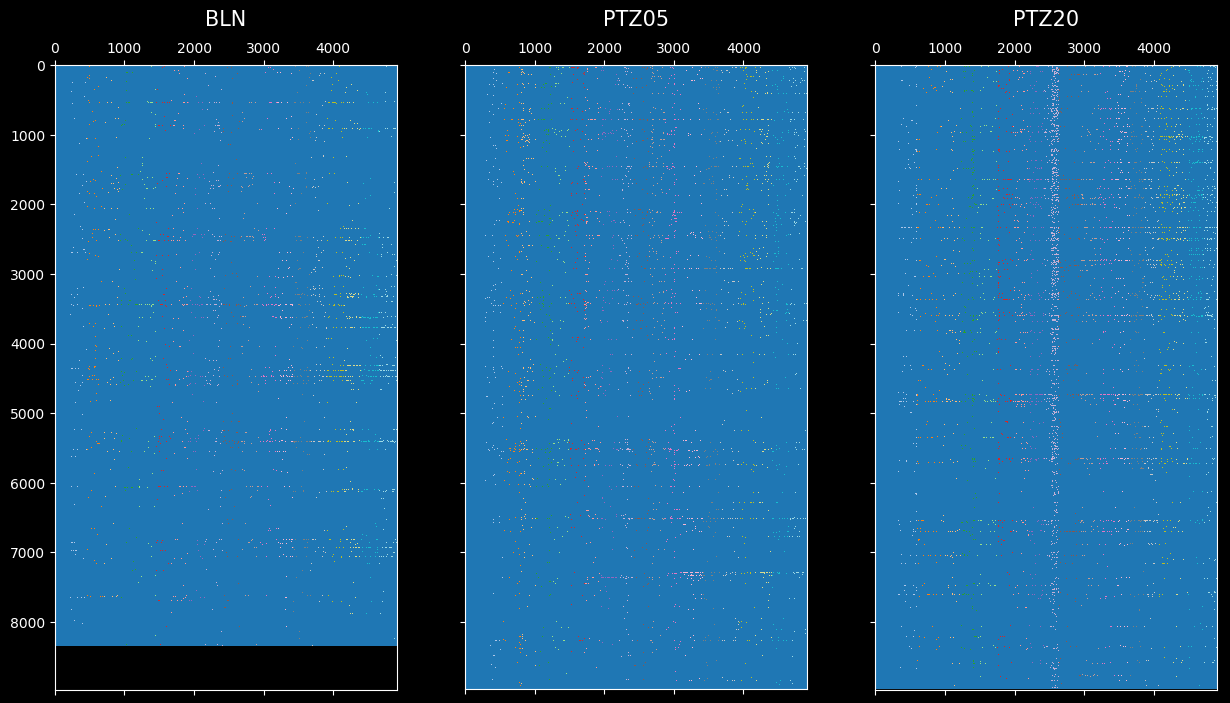

In [244]:
# PLOT - peak groups
#---------------------------------------------------------------------------
pltfn.rasplot(namelist = pkglist)

# Criticality models

<Figure size 432x288 with 0 Axes>

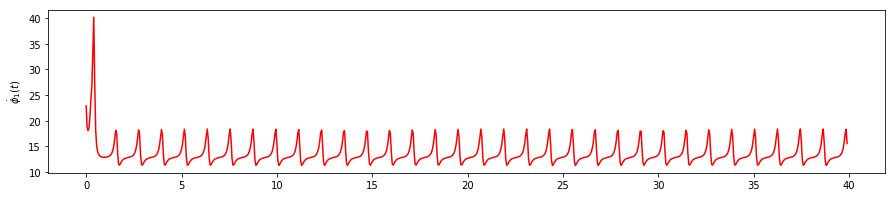

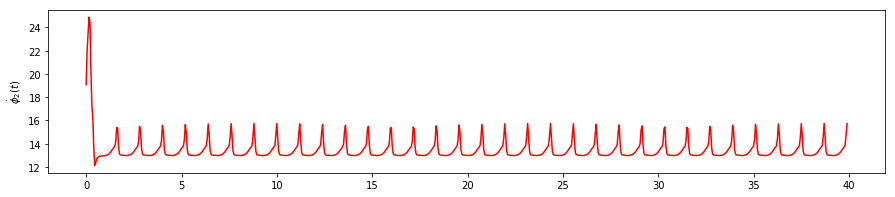

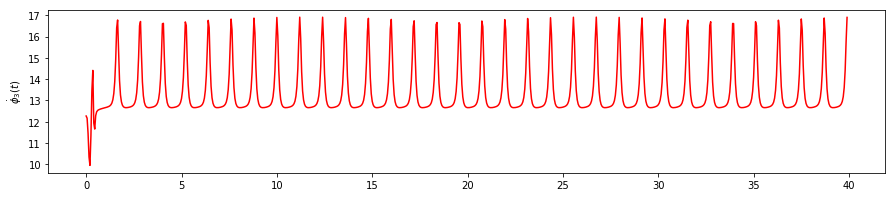

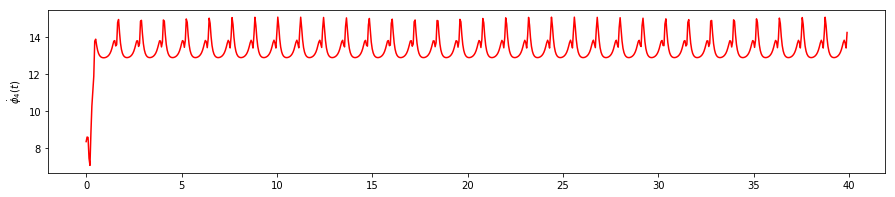

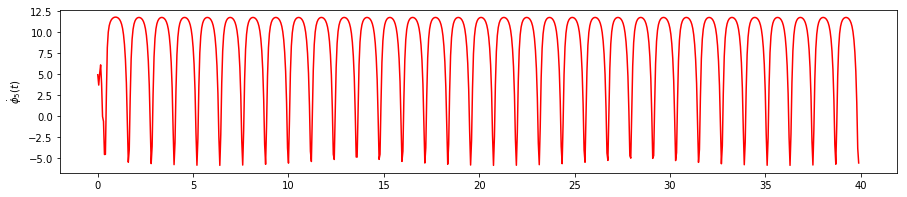

In [23]:
import numpy as np
import pylab as plt
#Passed arguments - dictionary with np arrays for:
#Y0 = initial phase
#W = intrinsic frequencies
#K = coupling matrix
_phase0 = np.array([0, np.pi,0,1, 5, 2, 3])
_freq = np.array([28,19,11,9, 2, 4])
_coupl = np.array([[ 2.3844,  1.2934,  0.6834,  2.0099,  1.9885],
                   [ -2.3854,  3.6510,  2.0467,  3.6252,  3.2463],
                   [ 10.1939,  4.4156,  1.1423,  0.2509,  4.1527],
                   [ 3.8386,  2.8487,  3.4895,  0.0683,  0.8246],
                   [ 3.9127,  1.2861,  2.9401,  0.1530,  0.6573]])
_coupl1 = np.array([[ 0.2628,  0.0043,  0.9399,  0.5107,  0.9857],
                   [ 0.8667,  0.8154,  0.4592,  0.9781,  0.0763],
                   [ 0.3723,  0.3856,  0.8374,  0.8812,  0.9419],
                   [ 0.1869,  0.2678,  0.9704,  0.2823,  0.3404],
                   [ 0.1456,  0.7341,  0.1389,  0.5602,  0.3823]])

_coupl = np.dstack((_coupl, _coupl1)).T

# Defining time array
t0, t1, dt = 0, 40, 0.05
T = np.arange(t0, t1, dt)
 
# Preparing oscillators with Kuramoto model
oscN = 5 # num of oscillators

phase0 = _phase0[:oscN]
freq = _freq[:oscN]
coupl = _coupl[:,:oscN,:oscN]

#Passing parameters as a dictionary
init_params = {'freq':freq, 'coupl':coupl, 'phase0':phase0}
 
# Running Kuramoto model
kuramoto = Kuramoto(init_params) #create new Kuramoto class with your parameters
#kuramoto.noise = 'logistic'
odePhi = kuramoto.solve(T)       #solve method (function of Kuramoto class) for your object, based on time array T
odeT = T[:-1]
 
# Plot the phases
plt.figure()

for comp in range(oscN):
    #plt.figure(figsize = (8,8))
    plt.subplots(1,1, figsize = (15,3))
    plt.plot(odeT, np.diff(odePhi[comp])/dt,'r')
    plt.ylabel('$\dot\phi_%i(t)$'%(comp+1))

#plt.suptitle("Instantaneous frequencies")
#plt.savefig('phases')
#plt.show()
    
# Computing phase dynamics
#phaseDynamics = np.diff(odePhi)/dt
 
# Plotting response
#nOsc = len(W)
#for osc in range(nOsc):
#    plt.subplot(nOsc, 1, 1+osc)
#    plt.plot(T[:-1], phaseDynamics[osc])
#    plt.ylabel("$\dot\phi_{%i}$" %(osc+1))
#plt.show()

In [19]:
from __future__ import print_function
import numpy as np
from scipy.integrate import ode


class Kuramoto():
    
    #DEFINE ARGUMENTS
    #dictonary containing numpy arrays for initial phase (phase0),
    #intrinsic frequencies (freq), coupling matrix (coupl)
    #---------------------------------------------------------
    def __init__(self, k_params):
        self.dtype = np.float32
        self.dt = 1. 
        self.phase0 = np.array(k_params['phase0'])
        self.freq = np.array(k_params['freq'])
        self.coupl = np.array(k_params['coupl'])
        self.n_osc = len(self.freq)  #how many oscillators
        self.m_order = self.coupl.shape[0] #cplmax

    #ODEs
    #Kuramoto ODE of mth harmonic order
    #freq1 = iterable frequency??
    #coupl1 = 3d coupling matrix, unless 1st order
    #--------------------------------------------------
    def kuramoto_ODE(self, t, y, arg):
        freq1, coupl1 = arg #input argument
        yt = y[:,None] #
        dy = y-yt    #????????
        phase = freq1.astype(self.dtype) #create phase variable of float type
    
        for m, _coupl1 in enumerate(coupl1):
            phase += np.sum(_coupl1*np.sin((m+1)*dy), axis = 1)
        return phase
    
    #JACOBIAN ODEs
    #JAcboian passed for ODE solver
    #--------------------------------------------------
    def kuramoto_ODE_jac(self, t, y, arg):
        freq1, coupl1 = arg #input argument
        yt = y[:,None] #
        dy = y-yt    #????????
        phase = [m*coupl1[m-1]*np.cos(m*dy) for m in range (1,1 + self.m_order)]
        phase = np.sum(phase, axis = 0)
        
        for i in range (self.n_osc):
            phase[i,i] = -np.sum(phase[:,i])
        return phase 
    
    #SOLVE ODEs
    #Solves Kuramoto ODE for time series t
    #with initial parameters when initiated object
    #--------------------------------------------------
    def solve(self,t):
        
        dt = t[1] - t[0]
        kODE = ode(self.kuramoto_ODE, jac = self.kuramoto_ODE_jac) #integrate differential equations
        kODE.set_integrator('dopri5')
        
        #set parameters into model
        kODE.set_initial_value(self.phase0, t[0])
        kODE.set_f_params((self.freq, self.coupl))
        kODE.set_jac_params((self.freq, self.coupl))
        
        phase = np.empty((self.n_osc, len(t)))
        
        #RUn ODE integrator
        for idx, _t in enumerate(t[1:]):
            phase[:,idx] = kODE.y
            kODE.integrate(_t)
        phase[:,-1] = kODE.y
        
        return phase


In [1586]:
# Create lists of trace data
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
blnpkg = sorted(glob.glob('*12*BLN*opracavdurpkg.npy'))
p5pkg = sorted(glob.glob('*12*PTZ05*opracavdurpkg.npy'))
p20pkg = sorted(glob.glob('*12*PTZ20*opracavdurpkg.npy'))
p20durlist = sorted(glob.glob('*12*PTZ20*opracavdurlist.npy'))
blndurlist = sorted(glob.glob('*12*BLN*opracavdurlist.npy'))
blncoord = sorted(glob.glob('*12*BLN*realcoord.npy'))
p20coord = sorted(glob.glob('*12*PTZ20*realcoord.npy'))
blncoord

['PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09_realcoord.npy']

In [ ]:
# Plot an illustrative example
#rdshift - right down, rushift - right up
#------------------------------------------------------
plane = 3
cell = 10
experiment = 'PTZ-WILDTYPE'
fnum = '07'
condition = 'BLN'
prefix = '/2photon/sess-01-6dpf/'

Fncellplot = crfn.cellplot(Ftm, Fdrop, experiment, fnum, prefix, condition, plane, cell, xshift = 10, yshift = 15)
# PLOT - average whole brain fluorescence
#----------------------------------------
deltalist = sorted(glob.glob('*E-12*deltaff.npy'))
f, axarr = plt.subplots(3,1,sharey=False, sharex=False, figsize = (15,5))
f.subplots_adjust(hspace=0)
for i in range(len(deltalist)):
    me = np.load(deltalist[i])
    axarr[i].set_title(deltalist[i][deltalist[i].find('dpf')+4:deltalist[i].find('run')-1] + ' ' + str(me.shape[1]), size = 10)
    new = np.apply_along_axis(np.mean, 0, me)
    axarr[i].plot(new)

plt.show()

In [1536]:
coordinate = np.load(blncoord[0])
coordinate

array([[163. , 426. ,   0. , 515. ,  52. ],
       [174. , 192. ,   0. , 550. , 161. ],
       [192. , 196. ,   0. , 196. ,  37. ],
       ...,
       [105. , 219.5,   9. ,  85. ,  74. ],
       [157. , 329. ,   9. ,  36. ,  92. ],
       [477. , 155. ,   9. , 248. ,   6. ]])

In [1537]:
pkg = np.load(blnpkg[0])
pkg

array([[0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 4.73042e+05,
        0.00000e+00, 0.00000e+00],
       ...,
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [0.00000e+00, 0.00000e+00, 8.60000e+01, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00]])

In [37]:
durlist = np.load(blndurlist[f])
counter = np.max(np.where(durlist[1:] != 0))
counter

12

In [7]:
f = 5
durlist = np.load(p20durlist[f])
durlist[1:]

array([142254,  38447,  15152,   8424,   5388,   3694,   2409,   1612,
         1107,    751,    474,    296,    200,     88,     63,     36,
           15,      7,      5,      1,      2,      0,      1,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0])

In [157]:
cutoff = 7

In [121]:
import itertools
uniqvalist = list(range(pkg.shape[1])) #empty list of length time frames
    
for e in range(pkg.shape[1]): #loop through each time point in pkg
    uniqval = np.unique(pkg[:,e]) #unique marker value in each time point
    uniqvalist[e] = uniqval #fill list of unique values in each time point

#link entire recording together
#-----------------------------------------------------------
linktime = list(itertools.chain(*uniqvalist)) #vector of all unique marker values in each time bin linked together

#find the max length of avalanches
#----------------------------------
noavlist = 0
index = []
for f in range(pkg.shape[1]): #loop through all time points in pkg to find longest length
    if f > 0:  
        if len(np.where(np.unique(linktime, return_counts = 'True')[1] == f)[0]) == 0: #find how many avalanches occur for each number of frames - each time you find an avalanche duration that has 0 avalanches - add to z list - keep iterating however as some avalanche lengths may skip frames - e.g. you may have no avalanche 5 frames long, but some 6.. etc long
            noavlist +=1
            if noavlist > 50: #once you have reached 50 empty avalanche durations set vector length to this and break
                index = f 
                break

#calculate how long each marker value is repeated for consecutively - any repeat must be a consecutive time frame
time = np.zeros(index, dtype = 'int')

for o in range(index):
    time[o] = len(np.where(np.unique(linktime, return_counts = 'True')[1] == o)[0])

In [57]:
#vector index = what marker value, element value = number of frames
markerlength = np.unique(linktime, return_counts = 'True')[1]

In [62]:
markerlength

array([9828,    4,    1, ...,    1,    1,    1])

In [158]:
bigmarker = np.where(markerlength == cutoff)[0]
bigmarker

array([    14,   3797,   4619,   6371,  19767,  19794,  20711,  24147,
        30213,  31093,  32547,  33596,  34189,  34871,  34961,  36233,
        45899,  50307,  51149,  51241,  51843,  54402,  55707,  56684,
        56981,  57193,  57497,  58073,  60686,  60705,  63929,  65272,
        65764,  66927,  67898,  69791,  70018,  70452,  70909,  72511,
        74266,  76937,  76965,  79032,  82563,  84733,  86624,  88687,
        89034,  95290,  98576, 107936, 108338, 110614, 112404, 113963,
       116917, 118598, 121285, 130521, 133216, 134394, 136075, 138217,
       138448, 140787, 150999, 160818, 162091, 162401, 162999, 167310,
       171092, 171492, 173752, 177694, 180674, 185467, 187182, 187831,
       192859, 193179, 193567, 195007, 195847, 196585, 196652, 199488,
       200224, 202117, 202179, 202341, 202949, 204000, 206765, 210700,
       217142, 218415, 224878, 225006, 227784, 228151, 229941, 239987,
       240781, 243128, 245452, 247941, 255474, 258437, 259006, 259619,
      

In [159]:
#loop through each marker value and find its initiation point
#---------------------------------------------------------------
avalanches = list(range(bigmarker.shape[0]))
for o in range(bigmarker.shape[0]):
    if o !=0:
        mini = np.min(np.where(pkg == bigmarker[o])[1]) #first avalanche time point for that marker
        findme = np.where(np.where(pkg == bigmarker[o])[1] == mini)[0] #indeces for all cells in this first time point
        celln = np.where(pkg == bigmarker[o])[0][findme] #cell number
        avalanches[o] = celln

In [73]:
#find all cells in that avalanche with time points
#---------------------------------------------------------------
avalanches = list(range(bigmarker.shape[0]))
for o in range(bigmarker.shape[0]):
    avalanches[o] =  np.where(pkg == bigmarker[o])#list for each avalanche where first array is cell location, second array is time points


KeyboardInterrupt: 

In [76]:
cellid = np.where(avalanches[avnum][1] == loopme[0])[0]

In [77]:
cellid

array([], dtype=int64)

In [842]:
avalanches[avnum][0][cellid]

array([5905, 6795, 6941, 7111])

In [101]:
len(avalanches)

263

In [812]:
np.sort(avalanches[2][1])

array([1835, 1835, 1835, 1835, 1836, 1836, 1836, 1837, 1838, 1838, 1839,
       1839, 1839, 1840, 1840, 1840, 1840, 1840, 1841, 1841, 1841, 1841,
       1841, 1842, 1842, 1842, 1842, 1843, 1843, 1844, 1845, 1846, 1847,
       1848, 1849, 1850, 1851, 1851])

In [818]:
np.argsort(avalanches[2][1])

array([ 0,  1,  2,  9, 18,  4,  3,  5,  6, 11, 21, 10,  7,  8, 20, 19, 24,
       12, 15, 13, 22, 23, 25, 37, 16, 14, 26, 17, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36])

In [820]:
avalanches[2][0][np.argsort(avalanches[2][1])]

array([5905, 6795, 6941, 7111, 8192, 6953, 6941, 6953, 6953, 7992, 8980,
       7951, 6953, 6953, 8535, 8502, 9270, 8053, 8071, 8053, 8980, 9068,
       9327, 9411, 8071, 8053, 9327, 8071, 9327, 9327, 9327, 9327, 9327,
       9327, 9327, 9327, 9327, 9407])

In [94]:
avnum = 2
loopme = np.unique(avalanches[avnum][1])

for z in range(len(loopme)):
    cellindex = np.where(avalanches[avnum][1] == loopme[0])[0] #indeces to find cells
    cellid = avalanches[avnum][0][cellid] #cell ids to plot from realcoord file
    

IndexError: invalid index to scalar variable.

In [21]:
avnum = 2
loopme = np.unique(avalanches[avnum][1])
loopme

array([1835, 1836, 1837, 1838, 1839, 1840, 1841, 1842, 1843, 1844, 1845,
       1846, 1847, 1848, 1849, 1850, 1851])

In [847]:
cellindex

array([0, 1, 2, 9])

In [848]:
cellid

array([5905, 6795, 6941, 7111])

In [18]:
avalanches[2][0][cellid]

array([5905, 6795, 6941, 7111])

In [19]:
4, 

68

IndexError: invalid index to scalar variable.

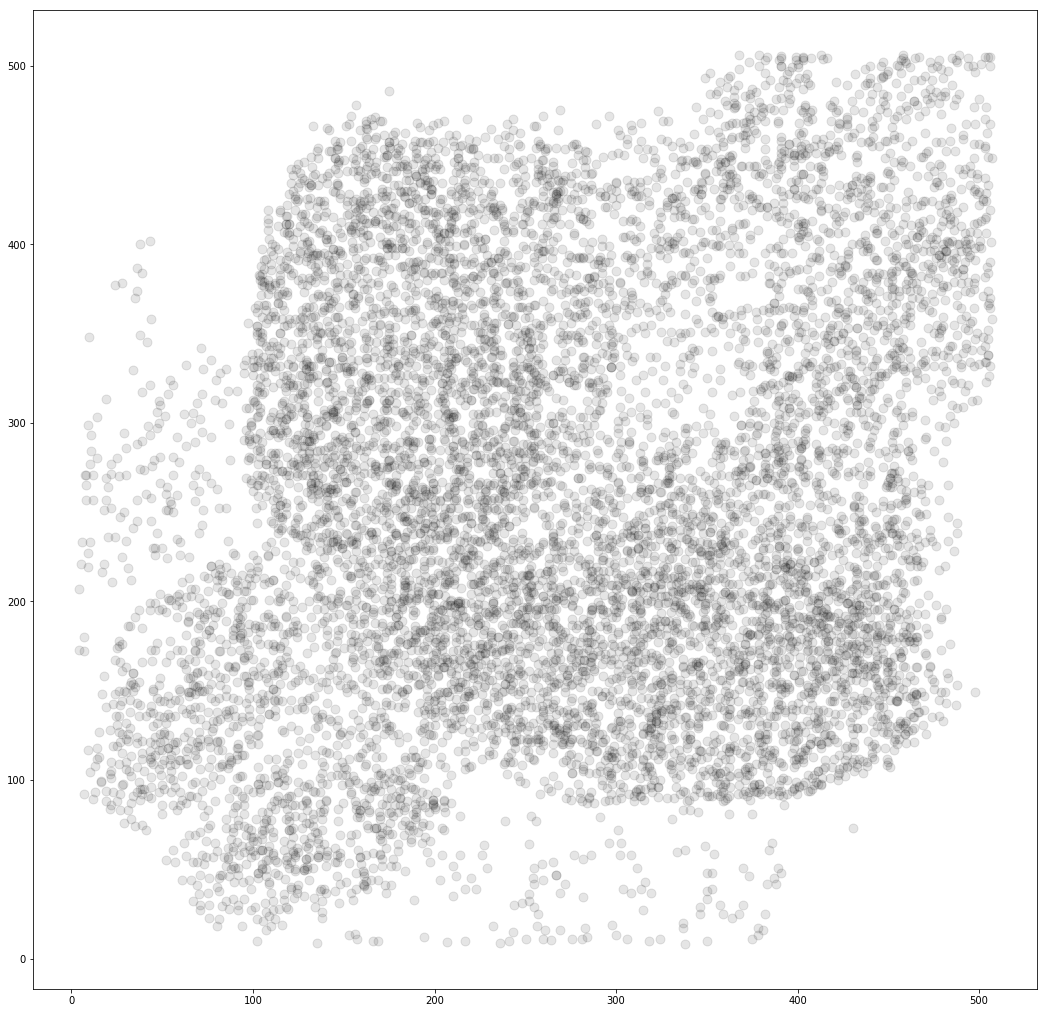

In [78]:
#PLOT AVALANCHEs over time
#--------------
from cycler import cycler
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.Spectral(np.linspace(0,1,len(loopme))))


os.chdir(Fdrop + 'Project/' + experiment)

avnum = 
coordz = np.load(coord[0])
fig, ax = plt.subplots(figsize= (18,18))
master = plt.scatter(coordz[:,0], coordz[:,1], s=80, c = 'k', alpha = 0.1)

loopme = np.unique(avalanches[avnum][1])
val = 1
for z in range(len(loopme)):
    cellindex = np.where(avalanches[avnum][1] == loopme[z])[0] #indeces to find cells
    cellid = avalanches[avnum][0][cellindex] #cell ids to plot from realcoord file
    dotplot = plt.scatter(coordz[cellid][:,0], coordz[cellid][:,1], s=80, alpha = val) #c = 'r', alpha = val)
    if z == 0:
        val = val - 0.2
    else:
        val = val - ((val/2)-(0.8/len(loopme)))

fig.gca().set_aspect('equal', adjustable='box')

#os.chdir(Ffig)
#plt.savefig('avtime9.png', transparent = True)

In [168]:
filld = list(range(len(avalanches)))
coj = 0
for i in range(len(avalanches)):
    if i > 0:
        if len(avalanches[i]) > 5:
            filld[coj] = i
            coj+=1
    

In [170]:
filld

[2,
 3,
 7,
 9,
 10,
 11,
 15,
 16,
 17,
 20,
 21,
 22,
 23,
 25,
 27,
 28,
 34,
 36,
 37,
 38,
 39,
 42,
 43,
 44,
 48,
 51,
 58,
 59,
 61,
 64,
 65,
 71,
 73,
 75,
 76,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 87,
 95,
 98,
 101,
 103,
 105,
 108,
 110,
 111,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115]

In [104]:
1, 5, 6, 10, 16, 22, 29

array([4270])

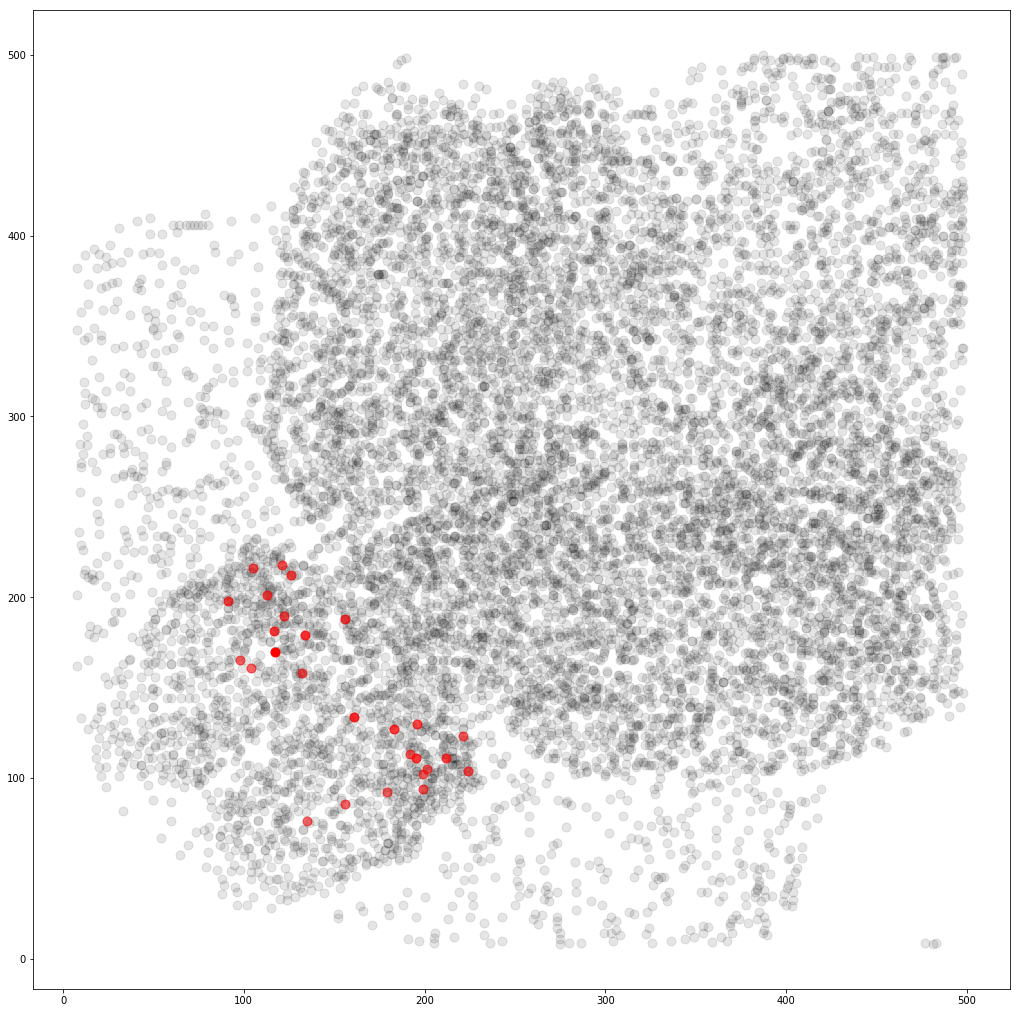

In [273]:
# PLOT AVALANCHEs over time
#--------------

os.chdir(Fdrop + 'Project/' + experiment)

avnum = filld[22]
coordz = np.load(coord[0])
fig, ax = plt.subplots(figsize= (18,18))
master = plt.scatter(coordz[:,0], coordz[:,1], s=80, c = 'k', alpha = 0.1)

loopme = np.unique(avalanches[avnum])
val = 1
for z in range(len(loopme)):
    cellindex = np.where(avalanches[avnum] == loopme[z])[0] #indeces to find cells
    cellid = avalanches[avnum][cellindex] #cell ids to plot from realcoord file
    dotplot = plt.scatter(coordz[cellid][:,0], coordz[cellid][:,1], s=80, c = 'r', alpha = val)
    if z == 0:
        val = val - 0.2
    else:
        val = val - ((val/16)-(0.8/len(loopme)))

fig.gca().set_aspect('equal', adjustable='box')

os.chdir(Ffig)
plt.savefig('avtimebln3.png', transparent = True)

In [860]:
val

-0.09999999999999987

In [82]:
coord

['PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_realcoord.npy']

In [81]:
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
coord = sorted(glob.glob('*-10*BLN*realcoord.npy'))

In [649]:
jet= plt.get_cmap('jet')
colors = iter(jet(np.linspace(0,1,10)))
for k in range(0,10):
    plt.plot(u_ordered[0*k:42*(k+1)], T_ordered[0*k:42*(k+1)], 'o',
color=next(colors))

419

In [763]:
xmean = np.mean(coordz[avalanches[2]][:,0])
ymean = np.mean(coordz[avalanches[2]][:,1])

In [756]:
coordz[avalanches[2]]

array([[215. , 264.5,   0. , 415. , 196. ],
       [236. , 272. ,   0. , 555. , 196. ],
       [220. , 248. ,   0. , 415. , 196. ],
       [267. , 296. ,   0. , 377. , 196. ],
       [290. , 323. ,   0. , 536. ,  88. ],
       [228. , 261. ,   1. ,  40. , 196. ],
       [248.5, 270. ,   1. ,  40. , 196. ],
       [241. , 304. ,   1. , 924. , 201. ],
       [246. , 265. ,   2. , 434. ,  66. ],
       [246. , 259. ,   2. , 854. ,  66. ],
       [289. , 344. ,   2. ,  34. , 161. ],
       [255.5, 281. ,   2. , 434. ,  66. ],
       [285. , 294. ,   2. , 592. ,  35. ],
       [262. , 267. ,   3. , 784. ,  88. ],
       [237. , 248. ,   3. , 603. ,  66. ],
       [271. , 297. ,   3. , 784. ,  88. ],
       [299. , 337. ,   3. , 517. ,  25. ],
       [326. , 324. ,   3. , 797. ,  41. ],
       [284. , 242. ,   3. , 220. ,  66. ],
       [267. , 252. ,   4. , 353. ,  88. ],
       [256. , 268. ,   4. , 841. , 108. ],
       [234. , 220. ,   4. , 495. , 114. ],
       [241. , 224. ,   4. , 130

Plot for all fish in same space

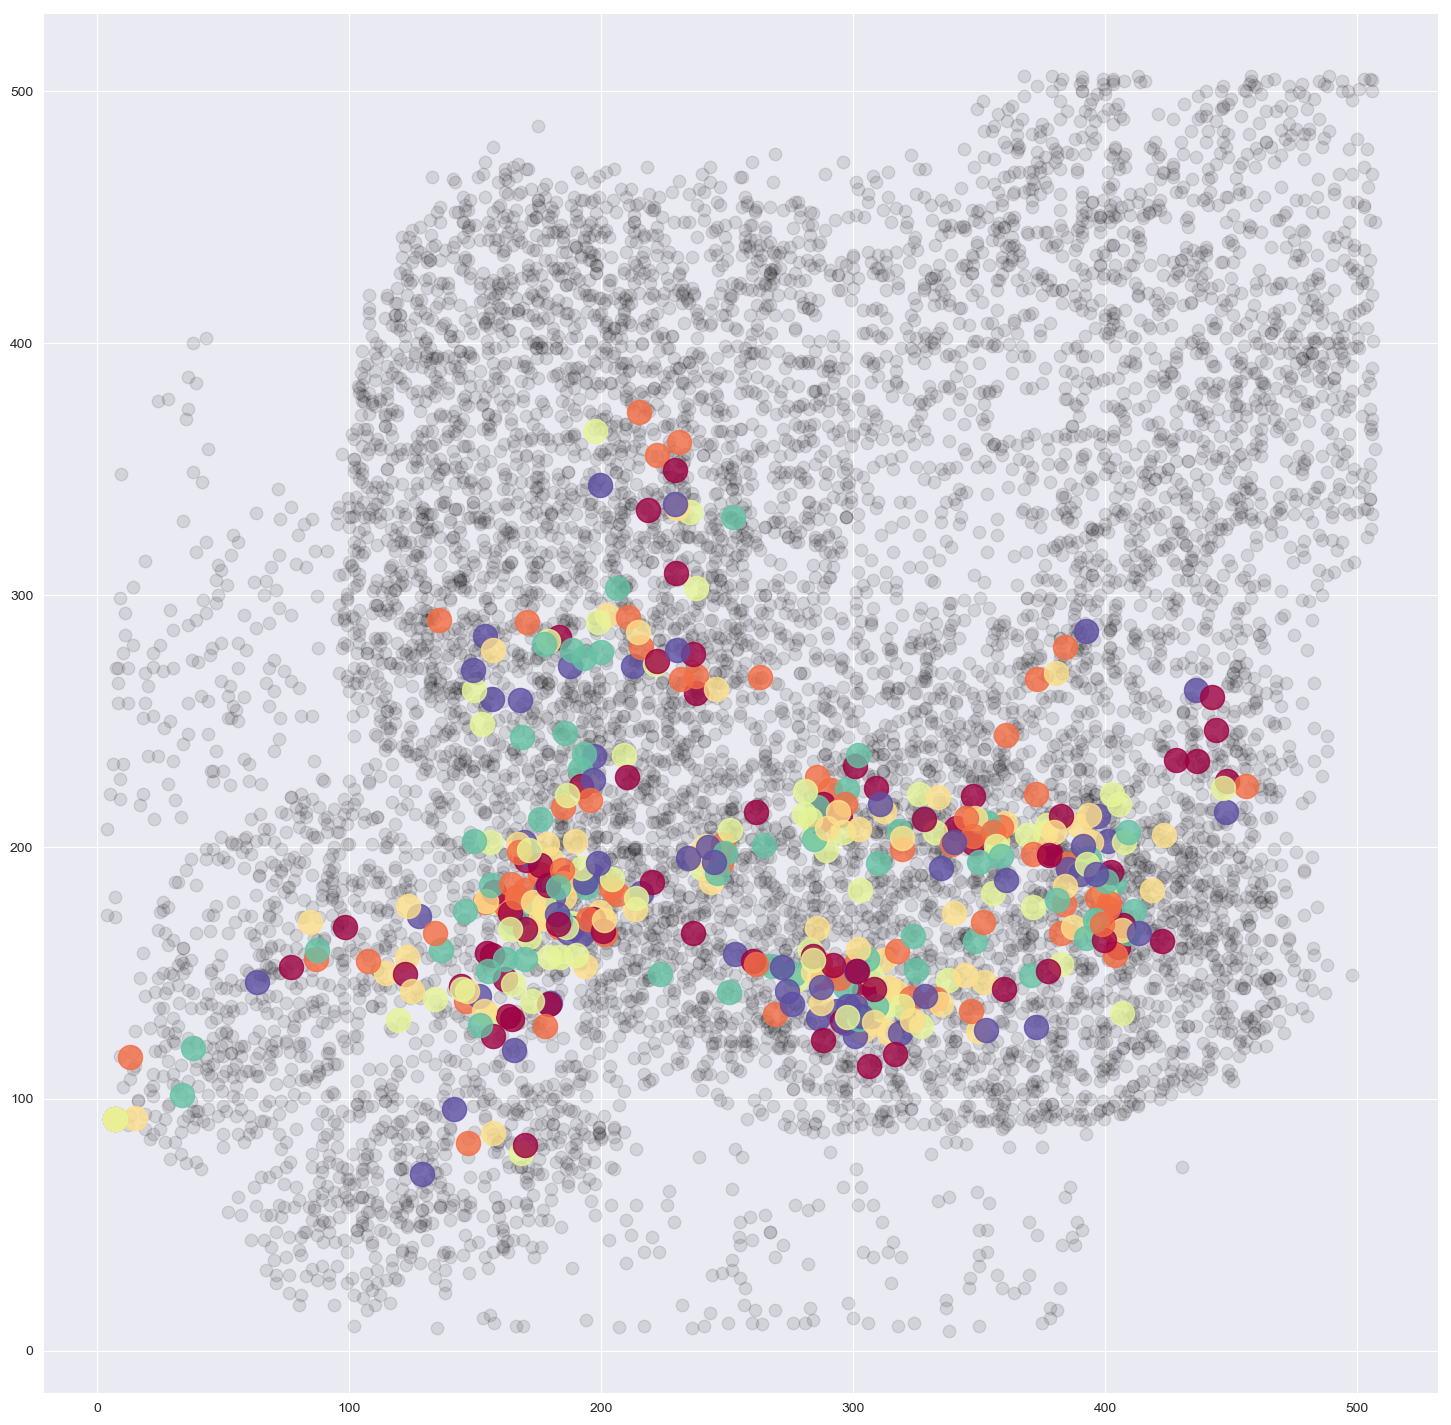

In [788]:
#PLOT AVALANCHEs mean location of beginning
#---------------------------------
from cycler import cycler
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.Spectral(np.linspace(0,1,N)))

coordz = np.load(coord[0])
fig, ax = plt.subplots(figsize= (18,18))
master = plt.scatter(coordz[:,0], coordz[:,1], s=80, c = 'k', alpha = 0.1)


for z in range(len(avalanches)):
    if z !=0:
        xmean = np.mean(coordz[avalanches[z]][:,0])
        ymean = np.mean(coordz[avalanches[z]][:,1])
        plt.scatter(xmean, ymean, s=300,  alpha = 0.8)
fig.gca().set_aspect('equal', adjustable='box')

os.chdir(Ffig)
plt.savefig('avstart.png', transparent = True)

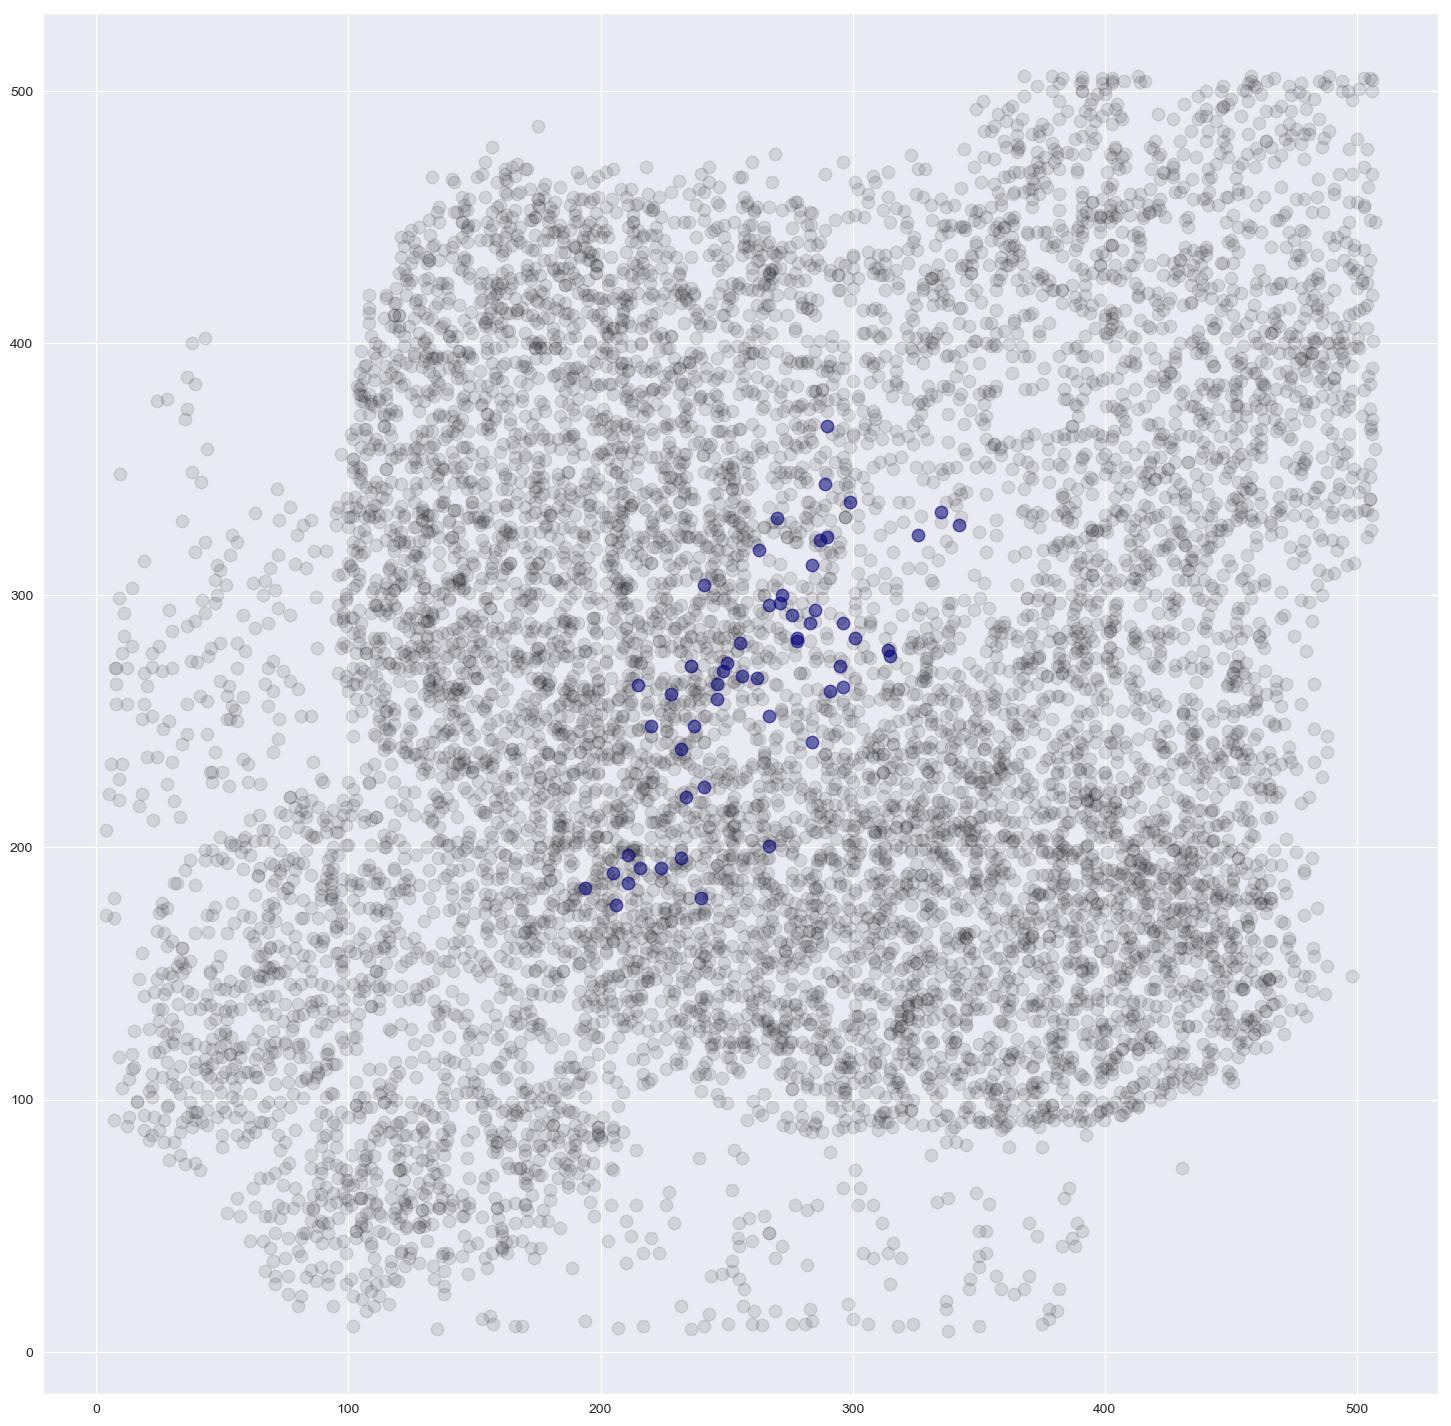

In [759]:
#PLOT AVALANCHEs all beginning cells
#---------------------------------
from cycler import cycler
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.jet(np.linspace(0,1,N)))

coordz = np.load(coord[0])
fig, ax = plt.subplots(figsize= (18,18))
master = plt.scatter(coordz[:,0], coordz[:,1], s=80, c = 'k', alpha = 0.1)

for z in range (2,3):#(np.int(len(avalanches)/30)):
    if z !=0:
        plt.scatter(coordz[avalanches[z]][:,0], coordz[avalanches[z]][:,1], s=80,  alpha = 0.5)
fig.gca().set_aspect('equal', adjustable='box')

#os.chdir(Ffig)
#plt.savefig('av11.png', transparent = True)

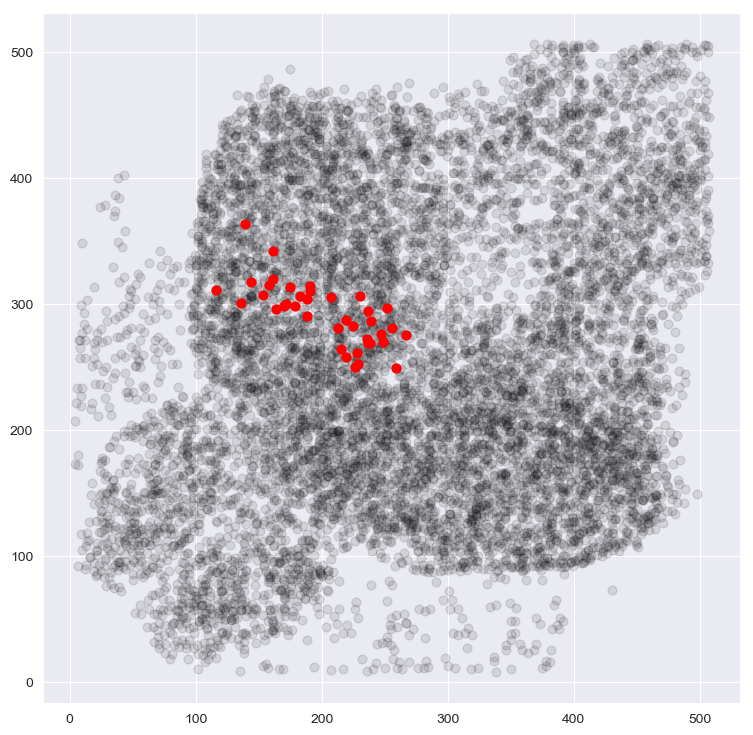

In [641]:
#PLOT AVALANCHEs
#--------------
coordz = np.load(coord[0])
fig, ax = plt.subplots(figsize= (18,18))
master = plt.scatter(coordz[:,0], coordz[:,1], s=80, c = 'k', alpha = 0.1)
z = 1
plt.scatter(coordz[avalanches[z]][:,0], coordz[avalanches[z]][:,1], s=80, c= 'r', alpha = 1)

               
fig.gca().set_aspect('equal', adjustable='box')

#os.chdir(Ffig)
#plt.savefig('av11.png', transparent = True)

In [585]:
#first row = cells where marker value is active
#second row = time points where marker is active
j = 2
np.where(pkg == bigmarker[j])

(array([  48,   73,   73,   73,  163,  251,  251,  265,  585,  684,  911,
        1070, 1070, 1174, 1174, 1174, 1398, 1805, 2003, 2173, 2257, 2272,
        2422, 2432, 2482, 3144, 3203, 3286, 3343, 3374, 3436, 3513, 3520,
        3781, 3781, 3781, 3781, 3781, 3834, 3903, 3903, 3962, 3989, 4062,
        4076, 4110, 4110, 4110, 4110, 4110, 4110, 4146, 4183, 4187, 4315,
        4315, 4315, 4332, 4334, 4359, 4367, 4410, 4466, 4543, 4678, 4756,
        4756, 4756, 4756, 4826, 4826, 4858, 4858, 4869, 4930, 4930, 4930,
        4930, 4930, 4930, 4949, 4954, 4957, 4957, 4987, 4987, 5067, 5082,
        5147, 5147, 5162, 5162, 5228, 5276, 5276, 5276, 5276, 5279, 5284,
        5284, 5316, 5316, 5316, 5316, 5335, 5335, 5335, 5335, 5335, 5377,
        5377, 5548, 5562, 5562, 5597, 5622, 5622, 5622, 5639, 5639, 5704,
        5754, 5754, 5754, 5811, 5975, 5988, 5994, 5994, 6034, 6034, 6034,
        6034, 6081, 6150, 6180, 6385, 6385, 6385, 6389, 6389, 6389, 6390,
        6399, 6453, 6461, 6492, 6505, 

In [586]:
mini = np.min(np.where(pkg == bigmarker[j])[1])
mini

1462

In [588]:
findme = np.where(np.where(pkg == bigmarker[j])[1] == mini)[0]
findme

array([  0,   1,   5,   8,   9,  10,  11,  13,  17,  19,  20,  22,  24,
        26,  27,  28,  29,  31,  32,  38,  41,  42,  43,  44,  52,  54,
        59,  60,  62,  73,  80,  81,  86,  87,  90, 114, 121, 127, 142,
       144, 146, 147, 167, 171, 173, 174, 175, 176, 178, 179, 185, 191,
       200, 201])

In [589]:
np.where(pkg == bigmarker[j])[0][findme]

array([  48,   73,  251,  585,  684,  911, 1070, 1174, 1805, 2173, 2257,
       2422, 2482, 3203, 3286, 3343, 3374, 3513, 3520, 3834, 3962, 3989,
       4062, 4076, 4183, 4315, 4359, 4367, 4466, 4869, 4949, 4954, 5067,
       5082, 5162, 5597, 5754, 5994, 6390, 6453, 6492, 6505, 7164, 7259,
       7522, 7535, 7544, 7597, 7639, 7752, 8240, 8611, 9403, 9459])

In [549]:
coordinate.shape

(9851, 5)

In [ ]:
fli = ['190409_wtp_F1_bln']
critlist = list()
for i in range(len(fli)):
    critlist.append(fli[i])


Fishnnb = np.load(Fdrop  +'/Project/PTZ/nnb/190409_wtp_F1_bln.npy')
Fishcoord = np.load(Fdrop + '/Project/PTZ/filtered/flt_190409_wtp_F1_bln/190409_wtp_F1_bln_all_cord.npy')
Fishbat = np.load(Fdrop  +'/Project/PTZ/filtered/flt_190409_wtp_F1_bln/190409_wtp_F1_bln_all_bin.npy')
Fishpkgsize = np.load(Fdrop  +'/Project/PTZ/criticality/pkg_size/190409_wtp_F1_bln.npy')
Fishpkgdur = np.load(Fdrop  +'/Project/PTZ/criticality/pkg_dur/190409_wtp_F1_bln.npy')

In [ ]:
#HOW MUCH DOES EACH CELL PARTICIPATE IN AVALANCHES
#---------------------------------------------------------
avf = np.zeros(Fishpkgsize[:,0].shape[0]) 

for i in range(Fishpkgsize[:,0].shape[0]):
    avf[i] = np.sum(Fishpkgsize[i,:]>1)/Fishpkgsize[0,:].shape[0]


In [ ]:
#AVALANCE FREQUENCY - BLN
fig, ax = plt.subplots(figsize= (18,18))
dotplot = plt.scatter(Fishcoord[:,0], Fishcoord[:,1], s=40, cmap = 'Spectral_r', c = avf, alpha = 0.7)
fig.colorbar(dotplot, ax = None)
fig.gca().set_aspect('equal', adjustable='box')
plt.clim(np.min(avf20z), 0.1)

os.chdir(Ffig)
plt.savefig('avfreqbln.png')

plt.show()

In [ ]:
#PROBABILITY OF EACH CELL PARTICIPATING IN AVALANCHE EVENT
#---------------------------------------------------------
avp = np.zeros(Fishpkgsize5z[:,0].shape[0]) 

for i in range(Fishpkgsize5z[:,0].shape[0]):
    avp[i] = np.sum(Fishpkgsize5z[i,:]>1)/np.sum(ahlist[21][0])


In [ ]:
#AVALANCE PROBABILITY - BLN
fig, ax = plt.subplots(figsize= (18,18))
dotplot = plt.scatter(Fishcoord[:,0], Fishcoord[:,1], s=40, cmap = 'Spectral_r', c = avp, alpha = 0.7)
fig.colorbar(dotplot, ax = None)
fig.gca().set_aspect('equal', adjustable='box')
plt.clim(np.min(avp), 0.0150)
os.chdir(Ffig)
plt.savefig('avprobbln.png')

plt.show()

In [ ]:
fig, ax = plt.subplots(figsize = (12,12))
choose = 21

plt.scatter(np.log(ahlist[choose][1][:-1]), np.log(ahlist[choose][0]/(np.sum(ahlist[choose][0]))), label = 'baseline', s = 100)
plt.scatter(np.log(ahlist[choose + 1][1][:-1]), np.log(ahlist[choose + 1][0]/(np.sum(ahlist[choose + 1][0]))), label = 'ptz5mm', s=100)
plt.scatter(np.log(ahlist[choose + 2][1][:-1]), np.log(ahlist[choose + 2][0]/(np.sum(ahlist[choose + 2][0]))), label = 'ptz20mm', s = 100, c = 'r')
plt.plot((np.max(np.log(ahlist[choose][1][:-1])),np.max(np.log(ahlist[choose][1][:-1]))), (-15,5), 'k--', linewidth = 3, )
#ax.legend()
plt.show()

In [285]:
# Create lists of trace data
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
blnpkgsize = sorted(glob.glob('*BLN*avsizepkg.npy'))
p20pkgsize = sorted(glob.glob('*PTZ20*avsizepkg.npy'))
blnsizelist = sorted(glob.glob('*BLN*avsizelist60*'))
p20sizelist = sorted(glob.glob('*PTZ20*avsizelist60*'))

In [287]:
blnsize = np.load(blnsizelist[5])
blnsize

array([67.,  5.,  2., ...,  6.,  1.,  2.])

In [288]:
p20size = np.load(p20sizelist[5])
p20size

array([ 8.,  8., 29., ...,  9.,  7.,  5.])

In [297]:
blnpkgsz = np.load(blnpkgsize[8])
blnpkgsz

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 2., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [298]:
p20pkgsz = np.load(p20pkgsize[8])
p20pkgsz

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [329]:
cutoff = 4*np.int(np.max((blnsize)))
cutoff

472

In [330]:
#DEFINE CUTOFF AND FIND TIMEPOINT OF AVALANCHES BEYOND CUTOFF
#------------------------------------------------------------
iflong = np.zeros(p20pkgsz.shape[0])

for i in range(p20pkgsz[:,0].shape[0]):
    if np.sum(np.unique(p20pkgsz[:,i], return_counts = True)[1][1:] > cutoff) > 0:
        iflong[i] = 1
    else: iflong[i] = 0
    


IndexError: index 9828 is out of bounds for axis 1 with size 9828

In [331]:
#identify which cells are involved
#---------------------------------
avtime = np.where(iflong>0)[0]
avcoord = list(range(len(avtime)))
time = 0
counter = 0

for t in avtime:
    time = np.unique(p20pkgsz[:,t], return_counts = True)[0][1:][np.where(np.unique(p20pkgsz[:,t], return_counts = True)[1][1:] > cutoff)[0]]
    if len(time) == 1:
        avcoord[counter] = np.where(p20pkgsz[:,t] == time[0])
        counter+=1
    

In [437]:
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
coord = sorted(glob.glob('*-10*PTZ20*realcoord.npy'))

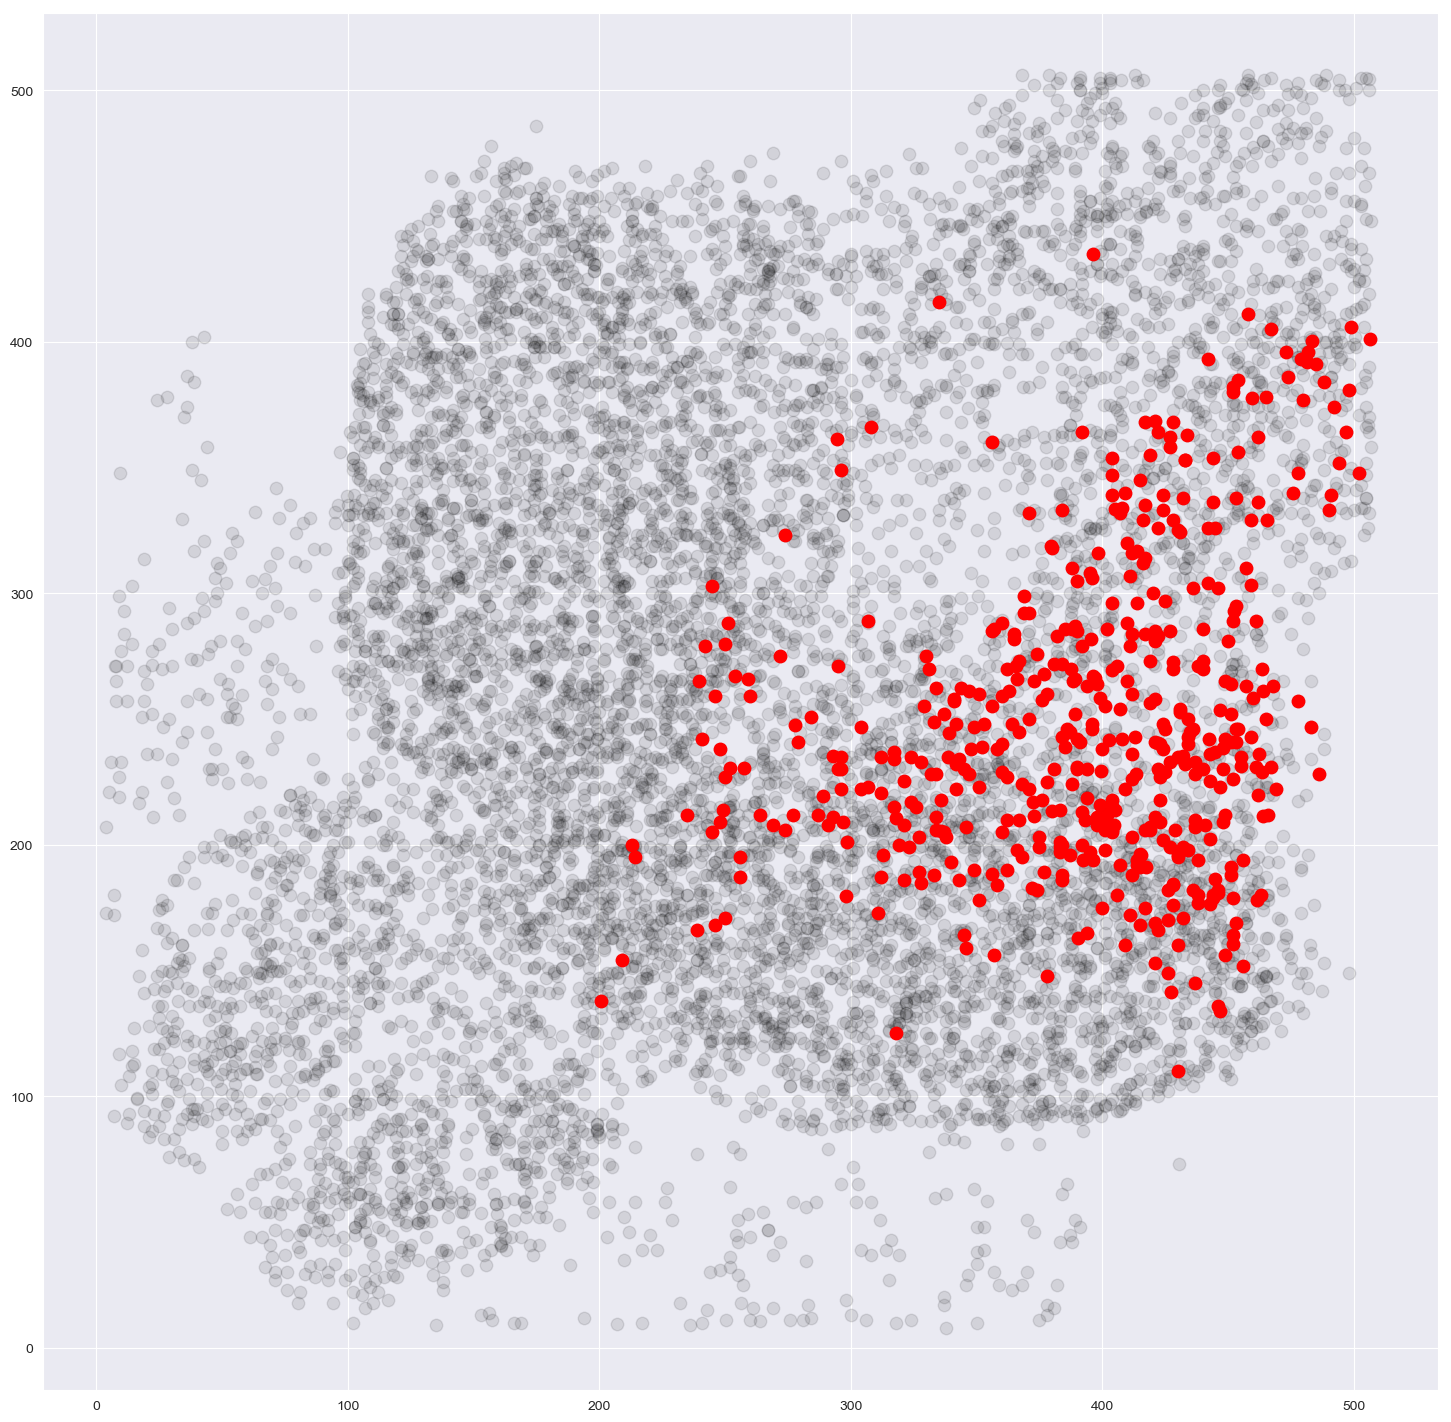

In [455]:
#PLOT AVALANCHEs
#--------------
avnum = 37
coordz = np.load(coord[0])
fig, ax = plt.subplots(figsize= (18,18))
master = plt.scatter(coordz[:,0], coordz[:,1], s=80, c = 'k', alpha = 0.1)
dotplot = plt.scatter(coordz[avcoord[avnum]][:,0], coordz[avcoord[avnum]][:,1], s=80, c = 'r', alpha = 1)
fig.gca().set_aspect('equal', adjustable='box')

os.chdir(Ffig)
plt.savefig('av11.png', transparent = True)

In [ ]:
#contribution of individual regions
#----------------------------------
np.load(Fdrop + os.sep + '/Project/PTZ/ptzrealreg.npy').shape

In [ ]:
Fishcoordz.shape

In [ ]:
#kernel density estimate
#---------------

fig, ax = plt.subplots(figsize= (12,12))
dotplot = plt.scatter(Fishcoordz[pracstack][0][:,0], Fishcoordz[pracstack][0][:,1], s=20, c = 'r', alpha = 0.005)
fig.gca().set_aspect('equal', adjustable='box')
plt.show()

In [ ]:
fig, axes = plt.subplots(figsize= (18,18))

x = Fishcoordz[pracstack][0][:,0]
y = Fishcoordz[pracstack][0][:,1]
nbins = 20
axes.set_title('Hexbin')
axes.hexbin(x, y, gridsize=nbins, cmap=plt.cm.magma)

os.chdir(Ffig)
plt.savefig('hexheatmapav.svg', transparent = True)

In [ ]:
data = np.random.multivariate_normal([0, 0], [[1, 0.5], [0.5, 3]], 200)
#x, y = data.T
data.T.shape

In [ ]:
from scipy.stats import kde
trans = Fishcoordz[pracstack][0][:,:2].T
k = kde.gaussian_kde(trans)
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

In [ ]:
fig, axes = plt.subplots(figsize= (18,18))

axes.set_title('Calculate Gaussian KDE')
axes.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.BuGn_r)


In [ ]:
fig, axes = plt.subplots(figsize= (18,18))

axes.set_title('2D Density with shading')
axes.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap=plt.cm.magma)


os.chdir(Ffig)
plt.savefig('2dkeheatmapav.png')

In [ ]:
pracstack = np.zeros((1,0)).astype(int)

for i in range(len(avcoord)):
    pracstack = np.hstack((avcoord[i], pracstack))
    

In [ ]:
#avalanche extent
#--------------------------


#avalanche size
#--------------------------
sizeav9 = np.zeros(82)

for i in range(82):
    sizeav9[i] = avcoord[i][0].shape[0]

In [ ]:
s1 = pd.Series(sizeav1, name='fish1')
#s2 = pd.Series(sizeav2, name='fish2')
s3 = pd.Series(sizeav3, name='fish3')
s4 = pd.Series(sizeav4, name='fish4')
s5 = pd.Series(sizeav5, name='fish5')
s6 = pd.Series(sizeav6, name='fish6')
#s7 = pd.Series(sizeav7, name='fish7')
s8 = pd.Series(sizeav8, name='fish8')
#s9 = pd.Series(sizeav9, name='fish9')
df = pd.concat([s1,s3, s4, s5, s6,  s8], axis=1)

In [ ]:
#plot av size
#----------------------------

import pandas as pd

ax = df.plot.kde(figsize=(34,16), style = '-', linewidth = 5, legend = False, fontsize = 40, alpha = 0.8)
ax.set_xlabel("Seizure avalanche size [cells]", fontsize = 40)
ax.set_ylabel("Density", fontsize = 40)

os.chdir(Ffig)
plt.tight_layout()
plt.savefig('supravdistribution.png')

In [ ]:
avcoord[130]

In [ ]:
#SPATIAL EXTENT
#------------------
#metrically scaled coordinates

dim = [.8, .8, 15]
coord = Fishcoordz6
mcs  = np.multiply(coord, dim)  


meandistance7 = np.zeros(130)
for i in range(130):
    #calculate mean coords for all avalanche
    distance = np.zeros(mcs[avcoord[i][0]].shape[0])
    meanx = np.mean(mcs[avcoord[i][0]][:,0])
    meany = np.mean(mcs[avcoord[i][0]][:,1])
    meanz = np.mean(mcs[avcoord[i][0]][:,2])
    meancoord = np.hstack((meanx,meany,meanz))
    #find euclidean distance for each coordinate
    #loop through each cell in avalanche|
    for j in range(mcs[avcoord[i][0]].shape[0]):
        distance[j] = np.linalg.norm(meancoord-mcs[avcoord[i][0]][j])
    meandistance7[i] = np.mean(distance)
        

In [ ]:
s1 = pd.Series(meandistance1, name='fish1')
s2 = pd.Series(meandistance2, name='fish2')
s3 = pd.Series(meandistance3, name='fish3')
s4 = pd.Series(meandistance4, name='fish4')
s5 = pd.Series(meandistance5, name='fish5')
s6 = pd.Series(meandistance6, name='fish6')
s7 = pd.Series(meandistance7, name='fish7')
s8 = pd.Series(meandistance8, name='fish8')
s9 = pd.Series(meandistance9, name='fish9')
df = pd.concat([s1, s2, s3, s5, s6, s7, s8, s9], axis=1)

In [ ]:

import pandas as pd

ax = df.plot.kde(figsize=(34,16), style = '-', linewidth = 5, legend = False, fontsize = 40, alpha = 1)
ax.set_xlabel("Seizure avalanche spatial extent ", fontsize = 40)
ax.set_ylabel("Density", fontsize = 40)

os.chdir(Ffig)
plt.tight_layout()
plt.savefig('supravextentdistribution.png')

In [ ]:
#save video
#---------------
avnum = 9

os.chdir(Ffig)

for i in range(50):
    fig, ax = plt.subplots(figsize= (12,12))
    master = plt.scatter(Fishcoordz[:,0], Fishcoordz[:,1], s=20, c = 'k', alpha = 0.1)
    dotplot = plt.scatter(Fishcoordz[avcoord[i]][:,0], Fishcoordz[avcoord[i]][:,1], s=20, c = 'r', alpha = 1)
    fig.gca().set_aspect('equal', adjustable='box')
    plt.savefig('av' + str(i) + '.tiff')


from skimage import io
from PIL import Image

os.chdir(Ffig)
ogli = sorted(glob.glob('*.tiff'))
omlist = []

for i in range(len(ogli)-1):
    readme = io.imread(Ffig + 'av' + str(i) + '.tiff')
    omlist.append(Image.fromarray(readme))
    #omlist.append(Image.fromarray(rotimglist[i]).convert('L'))
    
omlist[0].save(Ffig + "avmovie.tif", save_all=True,
               append_images=omlist[1:])

# RIP ----- Code Graveyard

In [ ]:
#ORDER NAMES
#-----------------


#=======================================================================
def order(datalist, n, cond, mode, block): # Select which fish data to visualise
#=======================================================================
    import numpy as np
    
    # Plot longest block of data
    #-------------------------------------------------------------
    if mode == 'longest':
        mylist = datalist
        sublist = list(range(n*cond))
        count = 0

        for i in range(len(mylist)):
            if i == len(mylist)-1:
                sublist[count] = mylist[i]
            else:
                name1 = mylist[i][:mylist[i].find('run')-1]
                name2 = mylist[i+1][:mylist[i+1].find('run') -1]
                if name1 != name2:
                    sublist[count] = mylist[i]
                    count+=1
        return(sublist)
    
        # Plot all 30 minute block of data
        #-------------------------------------------------------------
    if mode == 'half':
        mylist =datalist
        sublist = list(range((n*cond)))
        count = 0
        for i in range(len(mylist)):
            if '30.npy' in mylist[i]: 
                sublist[count] = mylist[i]
                count+=1
            if '30' + str(block) + '.npy' in mylist[i]: 
                sublist[count] = mylist[i]
                count+=1
        return(sublist)
    

In [ ]:
#AVALANCHE DURATION - OLD WAY
#------------------------------

    #find the max length of avalanches
    #----------------------------------
noavlist = 0
index = []
for f in range(pkg.shape[1]): #loop through all time points in pkg to find longest length
    if f > 0:  
        if len(np.where(np.unique(linktime, return_counts = 'True')[1] == f)[0]) == 0: #find how many avalanches occur for each number of frames - each time you find an avalanche duration that has 0 avalanches - add to z list - keep iterating however as some avalanche lengths may skip frames - e.g. you may have no avalanche 5 frames long, but some 6.. etc long
            noavlist +=1
            if noavlist > 50: #once you have reached 50 empty avalanche durations set vector length to this and break
                index = f 
                break
        #calculate how long each marker value is repeated for consecutively - any repeat must be a consecutive time frame
time = np.zeros(index, dtype = 'int')#vector of length index
for o in range(index):
    time[o] = len(np.where(np.unique(linktime, return_counts = 'True')[1] == o)[0])
        
                    
#avlist[y] = time
#pkglist[y] = pkg

#AVALANCHE SIZE - OLD WAY
#------------------------------

#Calculate size based on duration (each avalanche at each time point treated as a distinct event)
#-------------------------------------
newavlist = list(range(len(praclist)))   
for i in range(len(praclist)):
    pkg = np.load(pracpkg[i])

    binarray = np.load(binlist[i])
    av = np.array([])

            #loop through all time points
            #find all unique indeces at each time point where there is a value of 1 for a peak
            #append these coactivation values together to calculate total number of activations per time point
            #--------------------------------------------------------------------------------
    for t in range(binarray.shape[1]): 
        comms = np.unique(pkg[:,t][pkg[:,t] > 0])   
        for c in comms:
            av = np.append(av, pkg[:,t][pkg[:,t] == c].shape[0])    
    
    newavlist[i] = av
    np.save(Fdrop + 'Project/' + experiment + os.sep + nnblist[i][:nnblist[i].find('nnb')] + 'opracavsizelist.npy', newavlist[i])

In [ ]:

#=======================================================================
def avplot(histlist, mode, plot, n): # Plot av distribution
#=======================================================================
    import numpy as np
    from scipy import stats
    import matplotlib.pyplot as plt
    import os


    if mode == 'size':
        if plot == 'single':
            n = n*3
            fig, ax = plt.subplots(figsize = (6,6))
            plt.scatter(np.log(np.load(histlist[n])[1][:-1]), np.log(np.load(histlist[n])[0]/np.sum(np.load(histlist[n])[0])), label = 'baseline', s = 20)
            plt.scatter(np.log(np.load(histlist[n+1])[1][:-1]), np.log(np.load(histlist[n+1])[0]/np.sum(np.load(histlist[n+1])[0])), label = 'ptz5mm', s=20)
            plt.scatter(np.log(np.load(histlist[n+2])[1][:-1]), np.log(np.load(histlist[n+2])[0]/np.sum(np.load(histlist[n+2])[0])), label = 'ptz20mm', s = 20, c = 'r')
            plt.show()
            
        # Multi plot size and calculate exponent
        #--------------------------------------------------------------------------------------
        if plot == 'all':
            f, axarr = plt.subplots(4,3,sharey=True, sharex=True, figsize = (20,20))
            f.subplots_adjust(hspace=0)
            axarr = axarr.flatten()
            
            icounter = 0
            plt.subplots_adjust(wspace=0, hspace=0)
            for i in range(int(len(histlist)/3)):
                axarr[i].scatter(np.log(np.load(histlist[icounter])[1][:-1]), np.log(np.load(histlist[icounter])[0]/np.sum(np.load(histlist[icounter])[0])), label = 'baseline', s = 8)
                axarr[i].scatter(np.log(np.load(histlist[icounter+1])[1][:-1]), np.log(np.load(histlist[icounter+1])[0]/np.sum(np.load(histlist[icounter+1])[0])), label = 'ptz5mm', s=8)
                axarr[i].scatter(np.log(np.load(histlist[icounter+2])[1][:-1]), np.log(np.load(histlist[icounter+2])[0]/np.sum(np.load(histlist[icounter+2])[0])), label = 'ptz20mm', s = 8, c = 'r')
                icounter = icounter + 3

            axarr[7].set_xlabel('Avalanche size', fontsize = 40)
            axarr[3].set_ylabel('Probability', fontsize = 40)
            plt.show()
            
            
    # Define histogram parameters
    #-----------------------------------------------------------           
    if mode == 'dur':
            
        if plot == 'single':
            n = n*3
            fig, ax = plt.subplots(figsize = (6,6))
            xlist = np.linspace(0, len(np.load(histlist[n])), len(np.load(histlist[n])))
            plt.scatter(np.log(xlist), np.log(np.load(histlist[n]))/np.log(np.sum(np.load(histlist[n]))), label = 'baseline', s=50)
            plt.scatter(np.log(xlist), np.log(np.load(histlist[n+1]))/np.log(np.sum(np.load(histlist[n+1]))), label = 'ptz5mm', s=50)
            plt.scatter(np.log(xlist), np.log(np.load(histlist[n+2]))/np.log(np.sum(np.load(histlist[n+2]))), label = 'ptz20mm', s=50, c = 'r')
            plt.show()
            

            
            
            
        # Multiple plot duration
        #---------------------------------------------------------------------------------------
        if plot == 'all':

            f, axarr = plt.subplots(4,3,sharey=True, sharex=True, figsize = (20,20))
            f.subplots_adjust(hspace=0)
            axarr = axarr.flatten()
            icounter = 0

            plt.subplots_adjust(wspace=0, hspace=0)
            xlist = np.linspace(0, len(np.load(histlist[n])), len(np.load(histlist[n])))

            for i in range(int(len(histlist)/3)):
                axarr[i].scatter(np.log(xlist), np.log(np.load(histlist[icounter]))/np.log(np.sum(np.load(histlist[icounter]))), label = 'baseline', s = 15)
                axarr[i].scatter(np.log(xlist), np.log(np.load(histlist[icounter+1]))/np.log(np.sum(np.load(histlist[icounter+1]))), label = 'ptz5mm', s=15)
                axarr[i].scatter(np.log(xlist), np.log(np.load(histlist[icounter+2]))/np.log(np.sum(np.load(histlist[icounter+2]))), label = 'ptz20mm', s = 15, c = 'r')
                axarr[i].legend(loc='upper left')
                icounter = icounter + 3

            axarr[7].set_xlabel('Avalanche duration', fontsize = 40)
            axarr[3].set_ylabel('Probability', fontsize = 40)
            plt.show()


In [ ]:
#Old avalanche duration
#=======================================================================
def avduration(nnblist, binlist, Fdrop, experiment): # calculate avalanche duration, duration = normal (no convergence, cells in t must be active in t+1)
#=======================================================================
    import numpy as np
    import os
    import itertools

#Calculate avalanche size + duration
#-----------------------------------
    avlist = list(range(len(nnblist)))   
    pkglist = list(range(len(nnblist))) 
    for y in range(len(avlist)):
        binarray = np.load(binlist[y])
        nnbarray = np.load(nnblist[y])
        pkg    = np.zeros(binarray.shape) #peak groups by timebin
        i = 0
        marker = 0
        
        for t in range(binarray.shape[1]-1): #loop through all time points
            if i% round(10*binarray.shape[1]/100) == 0: print('doing time step ' + str(i) + ' of ' + str(binarray.shape[1]) + ' for fish ' + str(y))
            i = i+1
            cid = np.where(binarray[:,t] > 0)[0]  #cid = cells active at current time point
    
    #mark all avalanches in time point with different number
    #-------------------------------------------------------------------------------------
            for c in cid:            #loop through all active cells at this time point
                                     #mark all cells and its neighbours with same value 
                if pkg[c,t] == 0:
                    if len(np.intersect1d(np.where(nnbarray[c,:] > 0)[0], cid) > 2): #if >2 neighbours active
                        marker = marker + 1
                        pkg[c,t] = marker
        
        # Find all neighbours
        #-------------------------------------------------------------------
                neighbour = np.where(nnbarray[c,:] > 0)[0]  #return indeces of current cells neighbours
                neighbouron  = np.intersect1d(cid,neighbour)    #indeces of active cells in t, and also neighbours of c
                where0 = np.where(pkg[neighbouron,t] == 0)[0]
                pkg[neighbouron[where0],t] = pkg[c,t]  
    
    #mark all continuing avalanche with marker number in next frame
    #-------------------------------------------------------------------------------------
            n_av = np.unique(pkg[:,t])  #returns the marker values for each avalanche at this time point
            for n in n_av: #loop through each avalanche in this time point
                if n > 0:
                    cgroup = np.where(pkg[:,t] == n)[0] #cells that are in same avalanche at t
                    cid2 = np.where(binarray[:,t+1] > 0) #cells in next time point that are active
                    intersect = np.intersect1d(cgroup, cid2) #check if any of the same cells are active in next time point
                    wherealso0 = np.where(pkg[intersect,t+1] == 0)[0] #here we find all cells that are active in both time frames, and that are not part of an avalanche - and mark them as avalanche
                    pkg[intersect[wherealso0], t+1] = pkg[cgroup[0],t] #carry over value to next frame for those cells
       

        #Calculate unique avalanche marker values for each time point
        #------------------------------------------------------------
        print('Now calculating avalanche duration')
        
        
        
        if binarray.shape[1] == 4914:
            uniqvalist = list(range(pkg.shape[1])) #empty list of length time frames
            for e in range(pkg.shape[1]): #loop through each time point in pkg
                uniqval = np.unique(pkg[:,e]) #unique marker value in each time point
                uniqvalist[e] = uniqval #fill list of unique values in each time point
            
            #link entire recording together
            #-----------------------------------------------------------
            linktime = list(itertools.chain(*uniqvalist)) #vector of all unique marker values in each time bin linked together
            
            #find the max length of avalanches
            #----------------------------------
            noavlist = 0
            index = []
            for f in range(pkg.shape[1]): #loop through all time points in pkg to find longest length
                if f > 0:  
                    if len(np.where(np.unique(linktime, return_counts = 'True')[1] == f)[0]) == 0: #find how many avalanches occur for each number of frames - each time you find an avalanche duration that has 0 avalanches - add to z list - keep iterating however as some avalanche lengths may skip frames - e.g. you may have no avalanche 5 frames long, but some 6.. etc long
                        noavlist +=1
                        if noavlist > 50: #once you have reached 50 empty avalanche durations set vector length to this and break
                            index = f 
                            break
        
        #calculate how long each marker value is repeated for consecutively - any repeat must be a consecutive time frame
            time = np.zeros(index, dtype = 'int') #vector of length index
            for o in range(index):
                time[o] = len(np.where(np.unique(linktime, return_counts = 'True')[1] == o)[0])
            np.save(Fdrop + 'Project/' + experiment + os.sep + nnblist[y][:nnblist[y].find('nnb')] + 'avdurlist30.npy', time)
    
    
        if binarray.shape[1] == 9828:
               
            uniqvalist = list(range(pkg.shape[1])) #empty list of length time frames
            uniqvalist1 = list(range(np.int(pkg.shape[1]/2))) #empty list of length time frames
            uniqvalist2 = list(range(np.int(pkg.shape[1]/2))) #empty list of length time frames
    
            for e in range(pkg.shape[1]): #loop through each time point in pkg
                uniqval = np.unique(pkg[:,e]) #unique marker value in each time point
                uniqvalist[e] = uniqval #fill list of unique values in each time point
                uniqvalist1 = uniqvalist[:np.int(pkg.shape[1]/2)]
                uniqvalist2 = uniqvalist[np.int(pkg.shape[1]/2):]
                
                #link entire recording together
                #-----------------------------------------------------------
            linktime = list(itertools.chain(*uniqvalist)) #vector of all unique marker values in each time bin linked together
            linktime1 = list(itertools.chain(*uniqvalist1)) 
            linktime2 = list(itertools.chain(*uniqvalist2)) 
                #find the max length of avalanches
                #----------------------------------
            noavlist = 0
            index = []
            for f in range(pkg.shape[1]): #loop through all time points in pkg to find longest length
                if f > 0:  
                    if len(np.where(np.unique(linktime, return_counts = 'True')[1] == f)[0]) == 0: #find how many avalanches occur for each number of frames - each time you find an avalanche duration that has 0 avalanches - add to z list - keep iterating however as some avalanche lengths may skip frames - e.g. you may have no avalanche 5 frames long, but some 6.. etc long
                        noavlist +=1
                        if noavlist > 50: #once you have reached 50 empty avalanche durations set vector length to this and break
                            index = f 
                            break
        #calculate how long each marker value is repeated for consecutively - any repeat must be a consecutive time frame
            time = np.zeros(index, dtype = 'int')
            time1 = np.zeros(index, dtype = 'int') 
            time2 = np.zeros(index, dtype = 'int') #vector of length index
            for o in range(index):
                time[o] = len(np.where(np.unique(linktime, return_counts = 'True')[1] == o)[0])
                time1[o] = len(np.where(np.unique(linktime1, return_counts = 'True')[1] == o)[0])
                time2[o] = len(np.where(np.unique(linktime2, return_counts = 'True')[1] == o)[0])

            np.save(Fdrop + 'Project/' + experiment + os.sep + nnblist[y][:nnblist[y].find('nnb')]  + 'avdurlist60.npy', time)
            np.save(Fdrop + 'Project/' + experiment + os.sep + nnblist[y][:nnblist[y].find('nnb')]  + 'avdurlist30a.npy', time1)
            np.save(Fdrop + 'Project/' + experiment + os.sep + nnblist[y][:nnblist[y].find('nnb')]  + 'avdurlist30b.npy', time2)
        
                    
        avlist[y] = time
        pkglist[y] = pkg
        np.save(Fdrop + 'Project/' + experiment + os.sep + nnblist[y][:nnblist[y].find('nnb')] + 'avdurpkg.npy', pkg)
    return(avlist, pkglist)


        

In [ ]:
#Old avalanche size calculation
#=======================================================================
def avsize(nnblist, binlist, Fdrop, experiment): # calculate avalanche sizes, size = each distinct avalanche in a distinct time frame is counted
#=======================================================================
    import numpy as np
    import os 

#Calculate avalanche size + duration
#-----------------------------------
    avlist = list(range(len(nnblist)))   
    pkglist = list(range(len(nnblist))) 
    
    #Loop through all fish
    #-----------------------------------------------------------------
    for y in range(len(avlist)):
        binarray = np.load(binlist[y])
        nnbarray = np.load(nnblist[y])
        pkg    = np.zeros(binarray.shape) #peak groups by timebin
        act_t  = np.where(np.sum(binarray, axis=0) > 3)[0] #Time points with at least 3 cells active
        i = 0 
        for t in range(binarray.shape[1]-1): #loop through all time points
            if i% round(10*binarray.shape[1]/100) == 0: print('doing time step ' + str(i) + ' of ' + str(binarray.shape[1]) + 'for fish ' + str(y))
            i = i+1    
            
            #Label each time point (of >3 cells active) with marker value and add to it as it grows
            #--------------------------------------------------------------------------------------
            marker  = 1    #set a marker
            cid = np.where(binarray[:,t] > 0)[0] #cid is list of cells at this time point (>3 cells active) that are firing at time frame t
            
            #Loop through all cells in current time frame with a cell firing
            #if currently unlabelled, label with marker + 1
            #fill empty matrix with ones as all starting points
            #--------------------------------------------------------------------------------------        
            for c in cid:  
                if pkg[c,t] == 0:       
                    marker = marker + 1
                    pkg[c,t] = marker    
            
            #Find all neighbours
            #nb = indeces of neighbours of cell c
            #tgr = indeces that are common to both cid and nb - cells that are active and neighbours 
            #-------------------------------------------------------------------
                nb   = np.where(nnbarray[c,:] > 0)[0]  
                tgr  = np.intersect1d(cid,nb)   
                
                #Fill all pkg at time point t with marker value so they are the same
                #-------------------------------------------------------------------
                pkg[tgr,t] = pkg[c,t]   
        # For each time point count number of coactivations
        #----------------------------------------------------------------------------
        print('Now calculating avalanche size')
        if binarray.shape[1] == 4914:
            av = np.array([])
            for t in range(binarray.shape[1]): 
                comms = np.unique(pkg[:,t][pkg[:,t] > 0])   
                for c in comms:
                    av = np.append(av, pkg[:,t][pkg[:,t] == c].shape[0])
            np.save(Fdrop + 'Project/' + experiment + os.sep + nnblist[y][:nnblist[y].find('nnb')] + 'avsizelist30.npy', av)
            
        if binarray.shape[1] == 9828:
            av = np.array([])
            av1 = np.array([])
            av2 = np.array([])
            #loop through all time points
            #find all unique indeces at each time point where there is a value of 1 for a peak
            #append these coactivation values together to calculate total number of activations per time point
            #--------------------------------------------------------------------------------
            for t in range(binarray.shape[1]): 
                comms = np.unique(pkg[:,t][pkg[:,t] > 0])   
                for c in comms:
                    av = np.append(av, pkg[:,t][pkg[:,t] == c].shape[0]) 
                    if t < np.int(binarray.shape[1]/2):
                        av1 = np.append(av1, pkg[:,t][pkg[:,t] == c].shape[0])
                    if t > (np.int(binarray.shape[1]/2) - 1):
                        av2 = np.append(av2, pkg[:,t][pkg[:,t] == c].shape[0])
            np.save(Fdrop + 'Project/' + experiment + os.sep + nnblist[y][:nnblist[y].find('nnb')] + 'avsizelist60.npy', av)
            np.save(Fdrop + 'Project/' + experiment + os.sep + nnblist[y][:nnblist[y].find('nnb')] + 'avsizelist30a.npy', av1)
            np.save(Fdrop + 'Project/' + experiment + os.sep + nnblist[y][:nnblist[y].find('nnb')] + 'avsizelist30b.npy', av2)
        pkglist[y] = pkg
        avlist[y] = av
        np.save(Fdrop + 'Project/' + experiment + os.sep + nnblist[y][:nnblist[y].find('nnb')] + 'avsizepkg.npy', pkg)
    return(avlist, pkglist)

In [ ]:
#old histogram calculation
#=======================================================================
def hist(Fdrop, experiment, sublist, mode): # Select which fish data to visualise
#=======================================================================
    import numpy as np
    import os
    
    if mode == 'size':
        blnlist = list(range(np.int(len(sublist)/3)))
        counter = 0
        for i in range(len(sublist)):
            if 'BLN' in sublist[i]:
                blnlist[counter] = sublist[i]
                counter +=1

        # Define histogram parameters
        #-----------------------------------------------------------
        countlist = list(range(len(sublist)))
        countblnlist = list(range(len(sublist)))
        htlist = list(range(len(sublist)))
        maxlist = list(range(len(sublist)))
        minlist = list(range(len(sublist)))

        #binning for ptz conditions
        for i in range(len(sublist)):
            countlist[i] = np.load(sublist[i])
            maxlist = max(map(lambda x: x, countlist[i]))
            minlist = min(map(lambda x: x, countlist[i]))
        maxi = np.max(maxlist)
        mini = np.min(minlist)
        bind = np.linspace(mini, maxi, 500)

        #binning for bln conditions
        for i in range(len(blnlist)):
            countblnlist[i] = np.load(sublist[i])
            blnmaxlist = max(map(lambda x: x, countblnlist[i]))
            blnminlist = min(map(lambda x: x, countblnlist[i]))
        blnmaxi = np.max(blnmaxlist)
        blnmini = np.min(blnminlist)
        bindbln = np.linspace(blnmini, blnmaxi, 500)

        # Make histogram bins
        #-----------------------------------------------------------
        for y in range(len(htlist)):
            avdist = countlist[y]
            avdistcut  = avdist[avdist >= 2]
            if 'BLN' in sublist[y]:
                hist = np.histogram(avdistcut, bins = bindbln)
                htlist[y] = hist
                np.save(Fdrop + 'Project/' + experiment +os.sep + sublist[y][:sublist[y].find('run')+6] + '_' + 'opracavsizehist.npy', hist)
            else:
                hist = np.histogram(avdistcut, bins = bind)
                htlist[y] = hist
                np.save(Fdrop + 'Project/' + experiment +os.sep + sublist[y][:sublist[y].find('run')+6] + '_' + 'opracavsizehist.npy', hist)
        return(htlist)
        
    if mode == 'dur':     
        countlist = list(range(len(sublist)))
        htlist = list(range(len(sublist)))
        durmaxlist = list(range(len(sublist)))

        for i in range(len(sublist)):
            countlist[i] = np.load(sublist[i])
            durmaxlist[i] = np.max(np.where(countlist[i] > 0) [0])
        durmaxi = np.max(durmaxlist)
        xlist = np.linspace(0, durmaxi, durmaxi+3)

        for i in range(len(sublist)):
            addon = len(xlist) - countlist[i].shape[0]
            addzeros = np.zeros(addon)
            htlist[i] = np.append(countlist[i], addzeros)
            np.save(Fdrop + 'Project/' + experiment +os.sep + sublist[i][:sublist[i].find('run')+6] + '_' + 'opracavdurhist.npy', htlist[i])
        return(htlist)

In [ ]:
# calculates number of cells in each distinct avalanche event (takes ages)
#=======================================================================
def distinctduration(nnblist, binlist): # duration = normal, size = calculate from unique cells in duration
#=======================================================================
    import numpy as np
    
#Calculate avalanche size + duration
#-----------------------------------
    avlist = list(range(len(nnblist)))
    distlist = list(range(len(nnblist)))
    
    for y in range(len(avlist)):
        binarray = np.load(binlist[y])
        nnbarray = np.load(nnblist[y])
        pkg    = np.zeros(binarray.shape) #peak groups by timebin
        i = 0
        marker = 0
        distinctlist = (np.zeros(1)) #list containing updated number of distinct cells per avalanche
        
        for t in range(binarray.shape[1]-1): #loop through all time points
            #if i% round(10*binarray.shape[1]/100) == 0: print('doing time step ' + str(i) + 'of' + str(binarray.shape[1]) + 'for fish ' + str(y))
            #i = i+1
            print('done time point' + ' ' + str(t))
            cid = np.where(binarray[:,t] > 0)[0]  #cid = cells active at current time point
    
    #mark all avalanches in time point with different number
    #-------------------------------------------------------------------------------------
            for c in cid:            #loop through all active cells at this time point
                                     #mark all cells and its neighbours with same value 
                if pkg[c,t] == 0:
                    if len(np.intersect1d(np.where(nnbarray[c,:] > 0)[0], cid) > 2): #if >2 neighbours active
                        marker = marker + 1
                        pkg[c,t] = marker
                        distinctlist = np.hstack((distinctlist, (np.zeros(1)))) #once each marker is created append empty element to distinctlist vector for future addition
                        
        # Find all neighbours
        #-------------------------------------------------------------------
                neighbour = np.where(nnbarray[c,:] > 0)[0]  #return indeces of current cells neighbours
                neighbouron  = np.intersect1d(cid,neighbour)    #indeces of active cells in t, and also neighbours of c
                where0 = np.where(pkg[neighbouron,t] == 0)[0]
                pkg[neighbouron[where0],t] = pkg[c,t]
                
    #mark all continuing avalanche with marker number in next frame
    #-------------------------------------------------------------------------------------
            n_av = np.unique(pkg[:,t])  #returns the marker values for each avalanche at this time point
    
            for n in n_av: #loop through each avalanche in this time point
                if n > 0:                    
                    cgroup = np.where(pkg[:,t] == n)[0] #cells that are in same avalanche at t
                    cid2 = np.where(binarray[:,t+1] > 0) #cells in next time point that are active
                    intersect = np.intersect1d(cgroup, cid2) #check if any of the same cells are active in next time point
                    
                    wherealso0 = np.where(pkg[intersect,t+1] == 0)[0] #here we find all cells that are active in both time frames, and that are not part of an avalanche - and mark them as avalanche
                    pkg[intersect[wherealso0], t+1] = pkg[cgroup[0],t] #carry over value to next frame for those cells
                    
                    #if avalanche ends at this time point then calculate unique cells in this avalanche
                    if np.sum(intersect) == 0:
                        distinctlist[(np.int(n))] = len(np.unique(np.where(pkg == n)[0]))                                     
        avlist[y] = pkg
        distlist[y] = distinctlist
        
    return(avlist, distinctlist)


In [ ]:
#=======================================================================
def test2(nnblist, binlist): # duration = no convergence, cells in t need not be active in t+1, neighbours can be active
#=======================================================================
    import numpy as np
    
#Calculate avalanche size + duration
#-----------------------------------
    avlist = list(range(len(nnblist)))
    
    for y in range(len(avlist)):
        binarray = np.load(binlist[y])
        nnbarray = np.load(nnblist[y])
        pkg    = np.zeros(binarray.shape) #peak groups by timebin
        i = 0
        marker = 0
        
        for t in range(binarray.shape[1]-1): #loop through all time points
            if i% round(10*binarray.shape[1]/100) == 0: print('doing time step ' + str(i) + 'of' + str(binarray.shape[1]) + 'for fish ' + str(y))
            i = i+1
            cid = np.where(binarray[:,t] > 0)[0]  #cid = cells active at current time point
    
    #mark all avalanches in time point with different number
    #-------------------------------------------------------------------------------------
            for c in cid:            #loop through all active cells at this time point
                                     #mark all cells and its neighbours with same value 
                if pkg[c,t] == 0:
                    if len(np.intersect1d(np.where(nnbarray[c,:] > 0)[0], cid) > 2): #if >2 neighbours active
                        marker = marker + 1
                        pkg[c,t] = marker

        
        # Find all neighbours
        #-------------------------------------------------------------------
                neighbour = np.where(nnbarray[c,:] > 0)[0]  #return indeces of current cells neighbours
                neighbouron  = np.intersect1d(cid,neighbour)    #indeces of active cells in t, and also neighbours of c
                where0 = np.where(pkg[neighbouron,t] == 0)[0]
                pkg[neighbouron[where0],t] = pkg[c,t]
                
            
    #mark all continuing avalanche with marker number in next frame
    #-------------------------------------------------------------------------------------
            n_av = np.unique(pkg[:,t])  #returns the marker values for each avalanche at this time point
    
            for n in n_av: #loop through each avalanche in this time point
                if n > 0:
                    cgroup = np.where(pkg[:,t] == n)[0] #cells that are in same avalanche at t
                    cid2 = np.where(binarray[:,t+1] > 0) #cells in next time point that are active
                    intersect = np.intersect1d(cgroup, cid2) #check if any of the same cells are active in next time point
                    wherealso0 = np.where(pkg[intersect,t+1] == 0)[0] #here we find all cells that are active in both time frames, and that are not already part of another avalanche - and mark them as current avalanche
                    
                    neighboursnow = np.where(nnbarray[cgroup,:] > 0)[1]   #all neighbours of currently active cells
                    intersectneighcellt1 = np.intersect1d(neighboursnow,cid2) #cells active in next time point and neighbours of current time frame
                    
                    pkg[intersect[wherealso0], t+1] = pkg[cgroup[0],t] #carry over value to next frame for cells in last time point who are also active in next time point
                    pkg[intersectneighcellt1,t+1] = pkg[cgroup[0],t] #carry over marker value for neighbours of cells active in last time point, who are active in next
          
        avlist[y] = pkg    
    return(avlist)


In [ ]:
#avalanche distribution plotting regimes
#-----------------------------------------


f, axarr = plt.subplots(3,3,sharey=True, sharex=True, figsize = (20,20))
f.subplots_adjust(hspace=0)
axarr = axarr.flatten()
icounter = 0

plt.subplots_adjust(wspace=0, hspace=0)

for i in range(int(len(critfold)/3)):
    axarr[i].scatter(np.log(ahlist[icounter][1][:-1]), np.log(ahlist[icounter][0])/np.log(np.sum(ahlist[icounter][0])), label = 'baseline', s = 50)
    axarr[i].scatter(np.log(ahlist[icounter+1][1][:-1]), np.log(ahlist[icounter+1][0])/np.log(np.sum(ahlist[icounter+1][0])), label = 'ptz5mm', s=50)
    axarr[i].scatter(np.log(ahlist[icounter+2][1][:-1]), np.log(ahlist[icounter+2][0])/np.log(np.sum(ahlist[icounter+2][0])), label = 'ptz20mm', s = 50, c = 'r')
    #axarr[i].legend(loc='upper left')
    icounter = icounter + 3



axarr[7].set_xlabel('Avalanche size', fontsize = 40)
axarr[3].set_ylabel('Probability', fontsize = 40)

#$10^1$','$10^2$', '$10^3$', '$10^4$', '$10^5$', '$10^6$', '$10^7$', '$10^8$', '$10^9$' ), size = 15, color = 'white')
#plt.yticks(np.arange(15), (

#axarr[8].set_xticklabels([(['1','$\mathregular{10^{-1}}$', '$\mathregular{10^{-0.7}}$', '$\mathregular{10^{-0.4}}$', '$\mathregular{10^{-0.2}}$','$\mathregular{10^{-0.09}}$', '$\mathregular{10^{0}}$'], fontsize = 15) 
#axarr[7].set_xticklabels(['-0.2', '-0.2','0', '0.2', '0.4', '0.6'], fontsize = 15)
axarr[6].set_xticklabels(['$\mathregular{2x10^2}}$', '$\mathregular{10^1}}$','$\mathregular{10^2}}$', '$\mathregular{10^3}}$', '$\mathregular{10^4}}$', '$\mathregular{2x10^2}}$'], fontsize = 15)
axarr[0].set_yticklabels(['1','$\mathregular{10^{-1}}$', '$\mathregular{10^{-0.7}}$', '$\mathregular{10^{-0.4}}$', '$\mathregular{10^{-0.2}}$','$\mathregular{10^{-0.09}}$', '$\mathregular{10^{0}}$'], fontsize = 15)
axarr[3].set_yticklabels(['1','$\mathregular{10^{-1}}$', '$\mathregular{10^{-0.7}}$', '$\mathregular{10^{-0.4}}$', '$\mathregular{10^{-0.2}}$','$\mathregular{10^{-0.09}}$', '$\mathregular{10^{0}}$'], fontsize = 15)
axarr[6].set_yticklabels(['1','$\mathregular{10^{-1}}$', '$\mathregular{10^{-0.7}}$', '$\mathregular{10^{-0.4}}$', '$\mathregular{10^{-0.2}}$','$\mathregular{10^{-0.09}}$', '$\mathregular{10^{0}}$'], fontsize = 15)
axarr[0].locator_params(axis='x', nbins=5)

axarr[0].yaxis.set_tick_params(labelsize = 20)
axarr[8].xaxis.set_tick_params(labelsize=20)
axarr[3].yaxis.set_tick_params(labelsize = 20)
axarr[6].xaxis.set_tick_params(labelsize=20)
axarr[6].yaxis.set_tick_params(labelsize = 20)
axarr[7].xaxis.set_tick_params(labelsize=20)
axarr[2].legend(loc = 1, markerscale = 2,prop={'size': 30})


axarr[8].plot(x0, line0, c = 'k', linestyle = '--', linewidth = 3)
axarr[8].plot(x1, line1, c = 'k', linestyle = '--', linewidth = 3)
axarr[8].plot(x2, line2, c = 'k', linestyle = '--', linewidth = 3)




f, axarr = plt.subplots(3,3,sharey=True, sharex=True, figsize = (20,20))
f.subplots_adjust(hspace=0)
axarr = axarr.flatten()

plt.subplots_adjust(wspace=0, hspace=0)

for i in range(int(len(datalist))):
    bln  = datalist[i].iloc[0,:]
    p5 = datalist[i].iloc[1,:]
    p20 = datalist[i].iloc[2,:]
    x = np.linspace(1, bln.shape[0], num = bln.shape[0])
    axarr[i].scatter(np.log(x), np.log(bln)/np.log(np.sum(bln)), label = 'baseline', s=50)
    axarr[i].scatter(np.log(x), np.log(p5)/np.log(np.sum(p5)), label = 'ptz5mm', s=50)
    axarr[i].scatter(np.log(x), np.log(p20)/np.log(np.sum(p20)), label = 'ptz20mm', s=50, c = 'r')
    #axarr[i].legend(loc='upper left')

axarr[7].set_xlabel('Avalanche duration', fontsize = 40)
axarr[3].set_ylabel('Probability', fontsize = 40)

axarr[6].set_xticklabels(['$\mathregular{2x10^2}}$', '$\mathregular{10^{0}}$','$\mathregular{10^{1}}$', '$\mathregular{10^{2}}$', '$\mathregular{10^{3}}$', '$\mathregular{10^{4}}$', '$\mathregular{10^{5}}$'], fontsize = 15)
axarr[0].set_yticklabels(['1','$\mathregular{10^{-1}}$', '$\mathregular{10^{-0.7}}$', '$\mathregular{10^{-0.4}}$', '$\mathregular{10^{-0.2}}$','$\mathregular{10^{-0.09}}$', '$\mathregular{10^{0}}$'], fontsize = 15)
axarr[3].set_yticklabels(['1','$\mathregular{10^{-1}}$', '$\mathregular{10^{-0.7}}$', '$\mathregular{10^{-0.4}}$', '$\mathregular{10^{-0.2}}$','$\mathregular{10^{-0.09}}$', '$\mathregular{10^{0}}$'], fontsize = 15)
axarr[6].set_yticklabels(['1','$\mathregular{10^{-1}}$', '$\mathregular{10^{-0.7}}$', '$\mathregular{10^{-0.4}}$', '$\mathregular{10^{-0.2}}$','$\mathregular{10^{-0.09}}$', '$\mathregular{10^{0}}$'], fontsize = 15)
axarr[0].locator_params(axis='x', nbins=7)


axarr[0].yaxis.set_tick_params(labelsize = 20)
axarr[8].xaxis.set_tick_params(labelsize=20)
axarr[3].yaxis.set_tick_params(labelsize = 20)
axarr[6].xaxis.set_tick_params(labelsize=20)
axarr[6].yaxis.set_tick_params(labelsize = 20)
axarr[7].xaxis.set_tick_params(labelsize=20)
axarr[2].legend(loc = 1, markerscale = 2, prop={'size': 30})


axarr[5].plot(x0[:80], line0[:80], c = 'k', linestyle = '--', linewidth = 3)
axarr[5].plot(x1[:80], line1[:80], c = 'k', linestyle = '--', linewidth = 3)
axarr[5].plot(x2[:130], line2[:130], c = 'k', linestyle = '--', linewidth = 3)


os.chdir(Ffig)
plt.savefig('avalancheduration.png')